# <center><span style='color:green'> Telecom Churn Prediction Project</span></center>

The CRIP-DM process is used to provide business solutions for the churn prediction and make recommendations for important features for the predictions. The CRISP-DM is presented below: 

<img src="https://dfzljdn9uc3pi.cloudfront.net/2020/cs-267/1/fig-3-full.png" style="height: 300px; width:350 px;"/>

Figure 1: CRISP-DM phases and key outputs (adapted from Chapman et al. (2000))

  - Chapman, P., Clinton, J., Kerber, R., Khabaza, T., Reinartz, T., Shearer, C., & Wirth, R. (2000). CRISP-DM 1.0: Step-by-step data mining guide. SPSS inc, 9(13), 1-73.

After thorough understanding via EDA for the data and business, the well-prepared data are used for modelling, evaluating, modeling for the predictions.


### Table of Contents

1. [Packages importing and dataset loading up](#imp)
2. [Data Understanding, Preparation, and Pre-Processing](#und)
3. [Exploratory Data Analysis](#exp)
   - 3.1 [Data split: Create X, y and then Train test split](#tra)
   - 3.2 [Missing data handling](#mis)
   - 3.3 [Outliers handling](#out)
   - 3.4 [Feature scaling](#sca)
4. [Feature Engineering and Variable Transformation](#fea)
5. [Model building](#mod1)
6. [Use PCA and Logistic Regression for Classification](#lr)
7. [Tree Model Regression with RandomForestClassifier](#tmr)
8. [Get Feature Importance in Random Forests](#feaimp)
9. [Recommandations for better business solutions](#rec)

### Problem statement

In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

For many incumbent operators, retaining high profitable customers is the number one business
goal. To reduce customer churn, telecom companies need to predict which customers are at high risk of churn. In this project, you will analyze customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn, and identify the main indicators of churn.



**Customer behaviour during churn:**

Customers usually do not decide to switch to another competitor instantly, but rather over a
period of time (this is especially applicable to high-value customers). In churn prediction, we
assume that there are three phases of customer lifecycle :

1. <u>The ‘good’ phase:</U> In this phase, the customer is happy with the service and behaves as usual.

2. <u>The ‘action’ phase:</u> The customer experience starts to sore in this phase, for e.g. he/she gets a compelling offer from a competitor, faces unjust charges, becomes unhappy with service quality etc. In this phase, the customer usually shows different behaviour than the ‘good’ months. It is crucial to identify high-churn-risk customers in this phase, since some corrective actions can be taken at this point (such as matching the competitor’s offer/improving the service quality etc.)

3. <u>The ‘churn’ phase:</u> In this phase, the customer is said to have churned. In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month (September) is the ‘churn’ phase.

### Objective of the Project

- In this competition, your goal is *<u>to build a machine learning model that is able to predict churning customers based on the features provided for their usage.</u>*

#### The following steps will be performed :

1. <b>Data Understanding, Preparation, and Pre-Processing</b>:

   - Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation.

   - Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format.
 
2. <b>Exploratory Data Analysis</b>:

   -  Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables.

   - Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data.
 
3. <b>Feature Engineering and Variable Transformation</b> :

   - Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date.

   - Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data.
 
4. <b> Model Selection, Model Building, and  Prediction </b>:

   - Identifying the type of problem and making a list of decisive models from all available choices.

   - Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model.

   - Testing each model on the respective model evaluation metric.

   - Choosing the best model based on the fit of the data set and output variable.

   - Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem.

# 1. Packages importing and dataset loading up  <a id='imp'>

In [154]:
import pandas as pd #Data Processing
import numpy as np #Linear Algebra
import seaborn as sns #Data Visualization
import matplotlib.pyplot as plt #Data Visualization
import warnings #Warnings
warnings.filterwarnings ("ignore") #Warnings
from IPython.display import Markdown, display ,HTML

# 2. Data Understanding, Preparation, and Pre-Processing  <a id='und'>

#### 2.1 Read in Data: Train Data Set

In [155]:
#read in the CSV file
df_churn_train = pd.read_csv("train.csv") 
#diplay the first few rows
df_churn_train.head() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


#### 2.2. Describe Data: Train Data Set

In [156]:
#Identify the number of rows and columns in the data
df_churn_train.shape

(69999, 172)

##### Findings: There are 69999 Rows & 172 Columns avaiable in the Dataset.

In [157]:
#Find the information about the dataset
df_churn_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [158]:
#Get a summary for the data
df_churn_train.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


#### 2.3 Read in Data: Test Data Set

In [159]:
#read the CSV file as dataframe
df_churn_test = pd.read_csv("test.csv")
#diplay the 1st few rows of the dataset
df_churn_test.head() 

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,...,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,...,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00
2,70001,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,329.844,434.884,...,0,0,0,NaN,NaN,NaN,277,525.61,758.41,241.84
3,70002,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,43.550,171.390,...,0,0,0,NaN,NaN,NaN,1244,0.00,0.00,0.00
4,70003,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,306.854,406.289,...,0,0,0,NaN,NaN,NaN,462,0.00,0.00,0.00


#### 2.4. Describe Data: Test Data Set

In [160]:
#Get the number of rows and columns about the data
df_churn_test.shape

(30000, 171)

##### Findings: It shows 30000 Rows & 171 Columns available in the Dataset.

In [161]:
#Get the information about the dataset
df_churn_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [162]:
#Get a summary for the data
df_churn_test.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
count,30000.000000,30000.0,29684.0,29684.0,29684.0,30000.000000,30000.000000,30000.000000,28831.000000,28828.000000,...,30000.000000,30000.000000,30000.000000,7585.000000,7706.000000,7922.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,84998.500000,109.0,0.0,0.0,0.0,282.644348,279.355021,279.845167,130.629693,133.148632,...,0.073467,0.077967,0.082200,0.909954,0.906956,0.891946,1218.023200,68.314097,68.946576,59.891621
std,8660.398374,0.0,0.0,0.0,0.0,314.560212,323.205370,326.437029,290.677420,302.921820,...,0.557327,0.613596,0.611546,0.286267,0.290513,0.310468,960.109844,263.460641,278.749349,246.098292
min,69999.000000,109.0,0.0,0.0,0.0,-185.043000,-2014.045000,-146.859000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000
25%,77498.750000,109.0,0.0,0.0,0.0,92.907500,87.504750,84.180500,7.280000,6.660000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,466.000000,0.000000,0.000000,0.000000
50%,84998.500000,109.0,0.0,0.0,0.0,198.227500,191.775000,191.690500,34.760000,32.550000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,853.000000,0.000000,0.000000,0.000000
75%,92498.250000,109.0,0.0,0.0,0.0,371.969250,365.250750,367.804750,117.170000,115.210000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1795.000000,0.000000,0.000000,0.000000
max,99998.000000,109.0,0.0,0.0,0.0,10955.066000,13224.119000,13505.996000,6944.360000,7411.010000,...,28.000000,35.000000,30.000000,1.000000,1.000000,1.000000,4197.000000,6054.390000,7994.840000,6614.530000


#### 2.5 Data Preparation

In this study, three phases of customer lifecycle can assumed as follows:
 1. The 1st phase - ‘good’ (Month 6 & 7)
 2. The 2nd phase - ‘action’ (Month 8)
 3. The 3rd phase - ‘churn’ (Month 9)

Over the four-month time period, we can assume that the first two months are in a good phase, and the third one is the action phase. Then the fourth (last) one is the churn phase.

#### Derive NEW COLUMNS from findings

In [163]:
#Create a list of columns with the recharge amounts

recharge_cols =  df_churn_train.columns[df_churn_train.columns.str.contains('rech_amt|rech_data')]
print(recharge_cols,"\n\n")
print("The are the total of",len(recharge_cols),"columns with the recharge amounts")


Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8'],
      dtype='object') 


The are the total of 18 columns with the recharge amounts


#### 3.2. Missing data handling <a id='mis'>

First lets analyse the missing data. We can use missingno library for quick visualizations.

In [164]:
#Check percentages of missing values
 
df_check_null = df_churn_train.loc[:,recharge_cols].isnull().sum()/len(df_churn_train)
df_check_null = 100*df_check_null.round(decimals = 5)
df_check_null

total_rech_amt_6             0.000
total_rech_amt_7             0.000
total_rech_amt_8             0.000
max_rech_amt_6               0.000
max_rech_amt_7               0.000
max_rech_amt_8               0.000
date_of_last_rech_data_6    74.902
date_of_last_rech_data_7    74.478
date_of_last_rech_data_8    73.690
total_rech_data_6           74.902
total_rech_data_7           74.478
total_rech_data_8           73.690
max_rech_data_6             74.902
max_rech_data_7             74.478
max_rech_data_8             73.690
av_rech_amt_data_6          74.902
av_rech_amt_data_7          74.478
av_rech_amt_data_8          73.690
dtype: float64

##### Findings: The 'recharge' related columns with 'NaN' values are considered as missing

In [165]:
#Replace the NAN strings in columns with 0, because it's believed that there were no recharges for those 'NaN'

df_churn_train['total_rech_data_6'] = df_churn_train['total_rech_data_6'].replace(np.NaN,0.0)
df_churn_train['av_rech_amt_data_6'] = df_churn_train['av_rech_amt_data_6'].replace(np.NaN,0.0)

df_churn_train['total_rech_data_7'] = df_churn_train['total_rech_data_7'].replace(np.NaN,0.0)
df_churn_train['av_rech_amt_data_7'] = df_churn_train['av_rech_amt_data_7'].replace(np.NaN,0.0)

df_churn_train['total_rech_data_8'] = df_churn_train['total_rech_data_8'].replace(np.NaN,0.0)
df_churn_train['av_rech_amt_data_8'] = df_churn_train['av_rech_amt_data_8'].replace(np.NaN,0.0)

In [166]:
#Create new columns to sum up the total recharge amount. the new columns tilted "total_rech_amt_data" will 
# be used to create High Value customer.

df_churn_train['total_rech_amt_data_6'] = df_churn_train.av_rech_amt_data_6 + df_churn_train.total_rech_data_6

df_churn_train['total_rech_amt_data_7'] = df_churn_train.av_rech_amt_data_7 + df_churn_train.total_rech_data_7

df_churn_train['total_rech_amt_data_8'] = df_churn_train.av_rech_amt_data_8 + df_churn_train.total_rech_data_8

In [167]:
#Define the total average recharge amount for the good phase that are actually in both months 6 and 7.

df_churn_train['tot_avg_rech_amnt_6n7_goodPh'] =(df_churn_train.total_rech_amt_6 + df_churn_train.total_rech_amt_data_6 + df_churn_train.total_rech_amt_7 + df_churn_train.total_rech_amt_data_7) /2

### Select HIGH VALUED CUSTOMERS based on few Findings

- The HIGH VALUED CUSTOMERS are defined as those who have their average recharged amounts in the first two months (the good phase) are greater than or equal to 70th percentile of those. 

In [168]:
# create the cutoff for the high valued ones

high_value_cutoff = df_churn_train.tot_avg_rech_amnt_6n7_goodPh.quantile(0.7)
print('The avg recharge amount at 70 percentile for 6th and 7th months togather is at: '+str(high_value_cutoff),"\n")

# Select the high valued ones from the dataset

tele_high_valu = df_churn_train[df_churn_train.tot_avg_rech_amnt_6n7_goodPh > high_value_cutoff]
print('The Shape of Dataframe after selecting High Value Customers: ' + str(tele_high_valu.shape),"\n")

The avg recharge amount at 70 percentile for 6th and 7th months togather is at: 432.5 

The Shape of Dataframe after selecting High Value Customers: (20984, 176) 



### Identify churn customers and remove attributes of the churn phase

The churned customers (churn = 1, else 0) were tagged based on the usage of the fourth month in the following situations: 
- Those who didn't make any calls (either incoming or outgoing) AND didn't use mobile internet even once in the churn phase.

- The attributes that are used to tag churners are:
    - vol_2g_mb_8
    - vol_3g_mb_8
    - total_ic_mou_8
    - total_og_mou_8

- After churners are tagged, all the attributes with ‘ _8’ in their names are removed corresponding to the churn phase.

In [169]:
#get the four fore-mentioned columns in the data

high_val_cust_8 = ['vol_2g_mb_8','vol_3g_mb_8', 'total_ic_mou_8', 'total_og_mou_8']

high_val_cust_8

['vol_2g_mb_8', 'vol_3g_mb_8', 'total_ic_mou_8', 'total_og_mou_8']

In [170]:
# Check if there are stil the NA/Null values

df = 100*tele_high_valu.loc[:,high_val_cust_8].isnull().sum()/len(tele_high_valu)
df

vol_2g_mb_8       0.0
vol_3g_mb_8       0.0
total_ic_mou_8    0.0
total_og_mou_8    0.0
dtype: float64

In [171]:
# set  the values as 0 in the beginning

tele_high_valu['churn']= 0

In [172]:
# Use the boolean to flag cust_churned for customers whose the usage of month 8 equal to "zero"

cust_churned = (tele_high_valu.total_ic_mou_8 == 0) & \
               (tele_high_valu.total_og_mou_8 == 0) & \
               (tele_high_valu.vol_2g_mb_8 ==0) & \
               (tele_high_valu.vol_3g_mb_8 ==0)

# set those cust_churned with 1 as "True" condition

tele_high_valu.loc[cust_churned,'churn']=1

cust_churned

12       False
15       False
23       False
24       False
27       False
         ...  
69982    False
69984    False
69989    False
69996    False
69997    False
Length: 20984, dtype: bool

In [173]:
# Check the % of churned customers

print("The percentage of Churned Customers is: ",round(100*tele_high_valu.churn.sum()/len(tele_high_valu),2),"%")

The percentage of Churned Customers is:  5.47 %


In [174]:
tele_high_valu

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,tot_avg_rech_amnt_6n7_goodPh,churn
12,12,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,439.919,397.946,...,322,0.00,0.00,0.00,0,0.0,0.0,0.0,469.5,0
15,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,...,602,0.00,0.00,0.00,0,155.0,0.0,155.0,604.5,0
23,23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1130.948,905.506,...,455,0.00,0.00,0.00,0,0.0,0.0,0.0,1205.0,0
24,24,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,371.974,352.069,...,1219,0.00,0.00,0.00,0,24.0,48.0,24.0,469.5,0
27,27,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,390.489,350.985,...,573,700.40,185.71,173.72,0,209.0,306.0,217.0,826.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69982,69982,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,146.927,458.054,...,1577,0.00,0.00,0.00,0,0.0,276.0,0.0,449.0,0
69984,69984,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,1106.130,1609.381,...,283,6.48,102.80,127.41,0,452.0,0.0,0.0,1624.0,0
69989,69989,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,196.695,298.645,...,251,107.77,112.70,242.18,0,101.0,234.0,92.0,483.5,0
69996,69996,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,372.088,258.374,...,879,0.00,0.00,0.00,0,0.0,0.0,0.0,438.0,0


# 3. Exploratory Data Analysis <a id='exp'> 

#### Identify and then drop columns with only 1 or 2 unique values that will not make significant contributions for prediction

In [175]:
for i in tele_high_valu.columns :
    if len(pd.unique(tele_high_valu[i])) <= 2:
        print(i," <contains the number of the unique values> = ",len(pd.unique(tele_high_valu[i])))

circle_id  <contains the number of the unique values> =  1
loc_og_t2o_mou  <contains the number of the unique values> =  2
std_og_t2o_mou  <contains the number of the unique values> =  2
loc_ic_t2o_mou  <contains the number of the unique values> =  2
last_date_of_month_6  <contains the number of the unique values> =  1
last_date_of_month_7  <contains the number of the unique values> =  2
last_date_of_month_8  <contains the number of the unique values> =  2
std_og_t2c_mou_6  <contains the number of the unique values> =  2
std_og_t2c_mou_7  <contains the number of the unique values> =  2
std_og_t2c_mou_8  <contains the number of the unique values> =  2
std_ic_t2o_mou_6  <contains the number of the unique values> =  2
std_ic_t2o_mou_7  <contains the number of the unique values> =  2
std_ic_t2o_mou_8  <contains the number of the unique values> =  2
churn_probability  <contains the number of the unique values> =  2
churn  <contains the number of the unique values> =  2


In [176]:
drop_cols_w_1n2_unique_values =['circle_id', 
                            'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                            'last_date_of_month_6', 'last_date_of_month_7',
                            'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_ic_t2o_mou_6', 'std_ic_t2o_mou_7']

In [177]:
print("The number of features before dropping cols with low unique values : "+ str(tele_high_valu.shape[1]))
tele_high_valu.drop(drop_cols_w_1n2_unique_values,axis=1,inplace=True)
print("The number of features after dropping cols with low unique values : "+ str(tele_high_valu.shape[1]))

The number of features before dropping cols with low unique values : 177
The number of features after dropping cols with low unique values : 167


In [178]:
# Identify Features with the Object Type

df_date_cols = []
for i in tele_high_valu.columns :
    if tele_high_valu[i].dtypes == 'object':
        print(i," <dtypes is>= ",tele_high_valu[i].dtypes)
        df_date_cols.append(i)
        
df_date_cols

last_date_of_month_8  <dtypes is>=  object
date_of_last_rech_6  <dtypes is>=  object
date_of_last_rech_7  <dtypes is>=  object
date_of_last_rech_8  <dtypes is>=  object
date_of_last_rech_data_6  <dtypes is>=  object
date_of_last_rech_data_7  <dtypes is>=  object
date_of_last_rech_data_8  <dtypes is>=  object


['last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [179]:
# convert the cols with Object Type to Date Type

for col in df_date_cols:
    tele_high_valu[col] = pd.to_datetime(tele_high_valu[col])

## Set up a boxplot template for visualizating Features

In [180]:
# create a setup template for box plots for 6th, 7th, and 8th month cols

def plot_box_chart(attribute):
    plt.figure(figsize=(18,16))
    df = tele_high_valu
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("tab10"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("tab10"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("tab10"))
    plt.show()

## A. check data for features related to "recharge amount"  

In [181]:
# List columns that have rech_amt (recharge amount) in the feature names

rechar_amnt_cols =  tele_high_valu.columns[tele_high_valu.columns.str.contains('rech_amt')]
rechar_amnt_cols.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

### A.1 Plot box charts for total_rech_amt

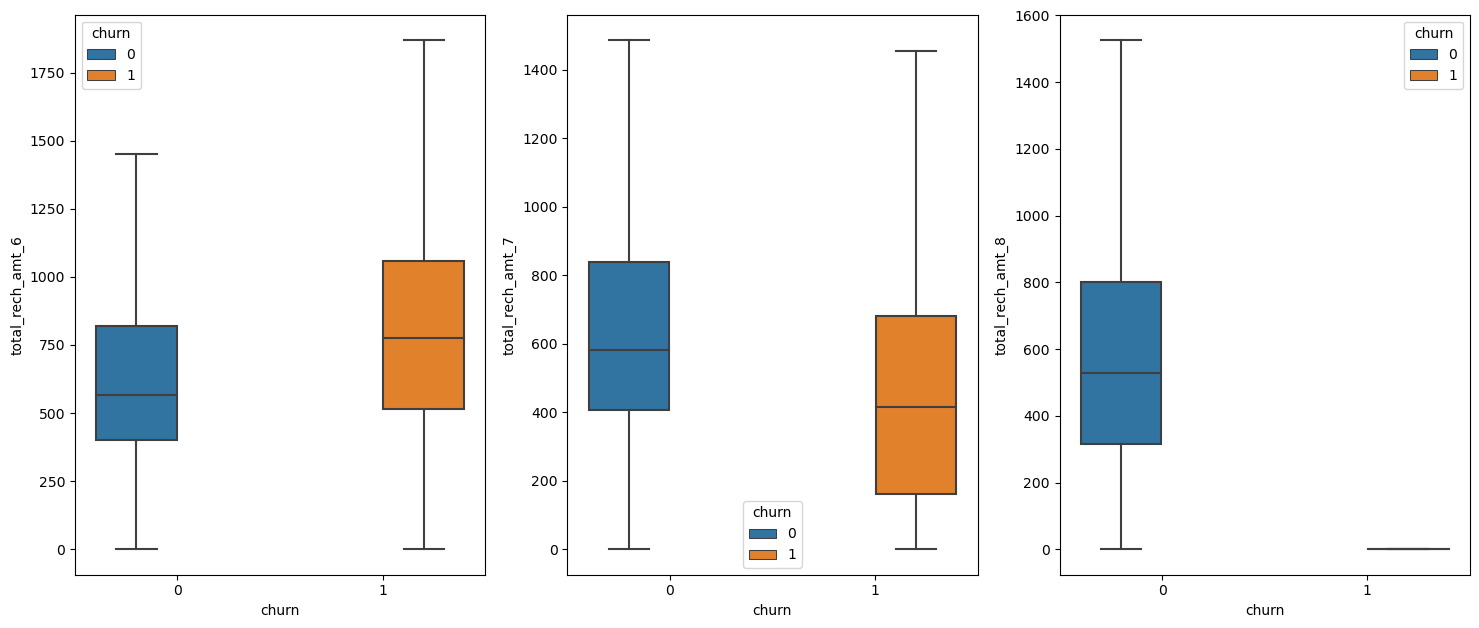

In [182]:
# Plot box charts for total recharge amount

plot_box_chart('total_rech_amt')

##### Findings: Huge drops were found in the total recharge amount for churned customers in the 8th Month, which was at the Action Phase.

### A.2 Plot box charts for total_rech_amt_data

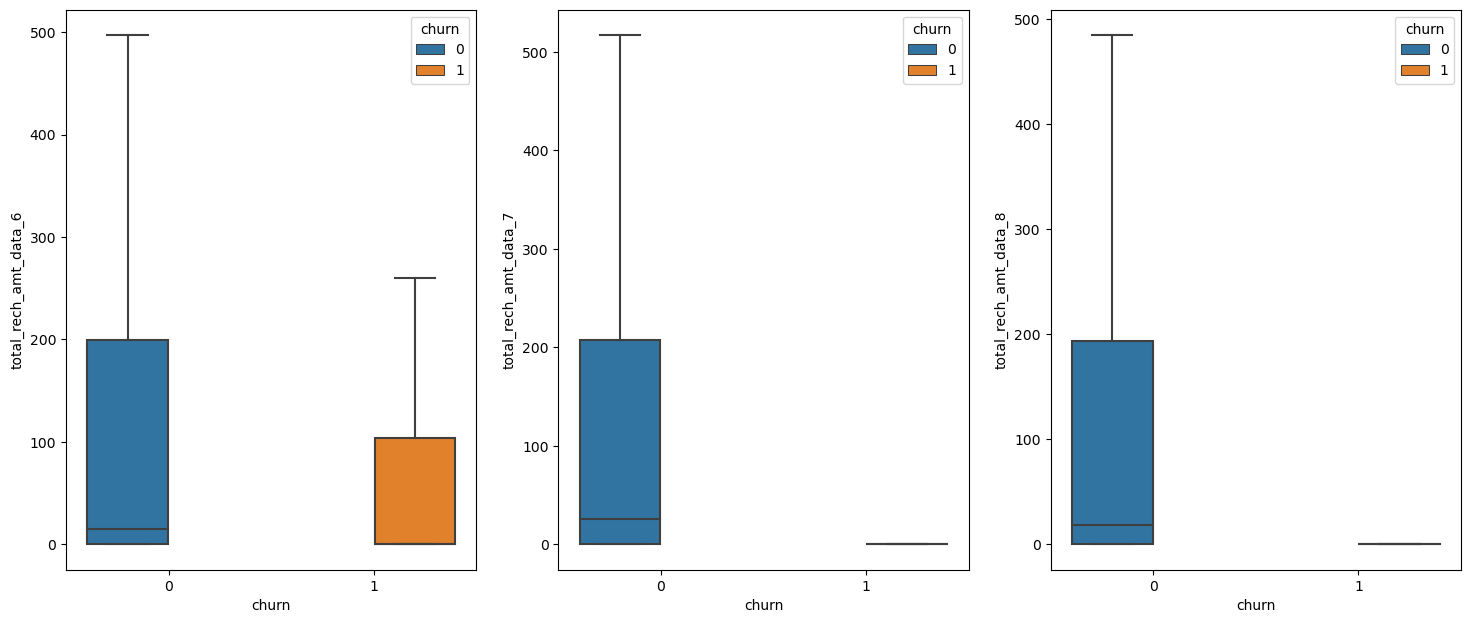

In [183]:
# Plot box charts for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

##### Findings: Huge drops were found in the total recharge amount for the data in the 7th and 8th Months

### A.3 Plot box charts for max_rech_amt

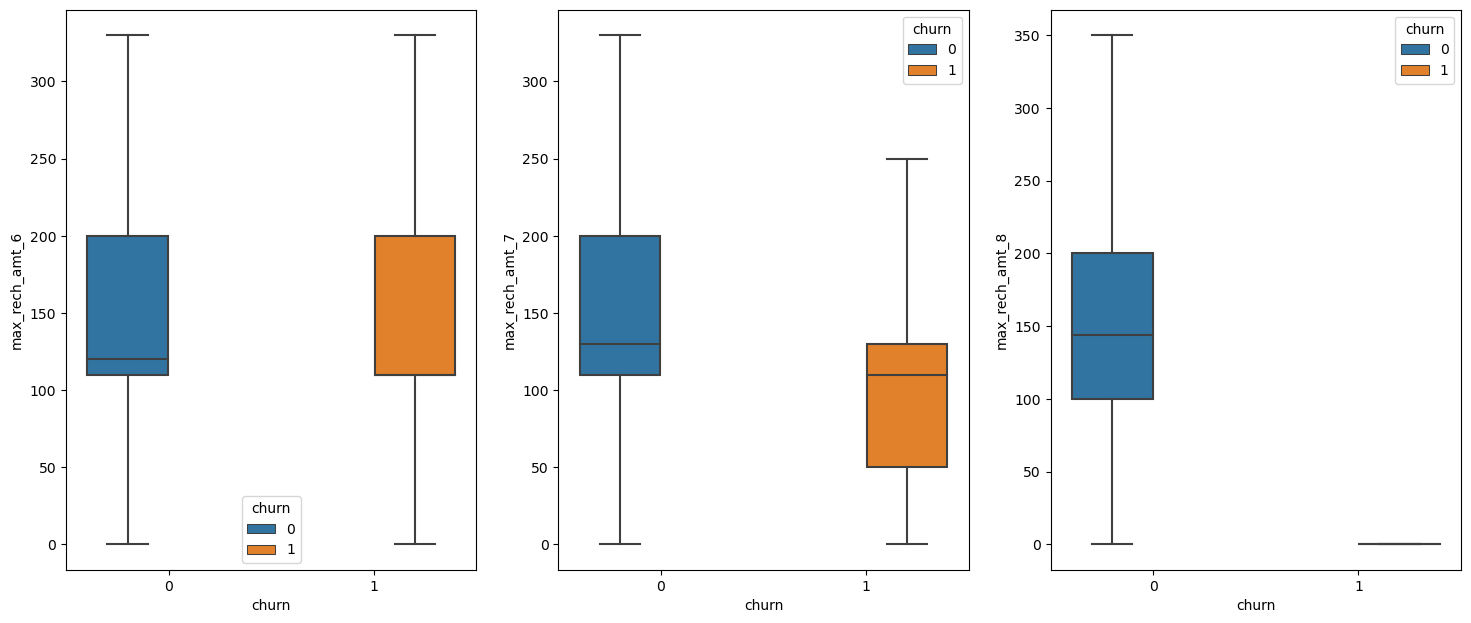

In [184]:
# Plot box charts for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

##### Findings:  Huge drops were found in the maximum recharge amount for data in the 8th Month, which was at the Action Phase.

In [185]:
# Check data for other recharge related featrues

Recharg_others = tele_high_valu.columns[tele_high_valu.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [186]:
# Check the % of missing values for other recharge related features

100*tele_high_valu.loc[:,Recharg_others].isnull().sum()/len(tele_high_valu)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     50.443195
max_rech_data_7     49.428136
max_rech_data_8     51.725124
dtype: float64

### A.4 Plot box charts for total_rech_num

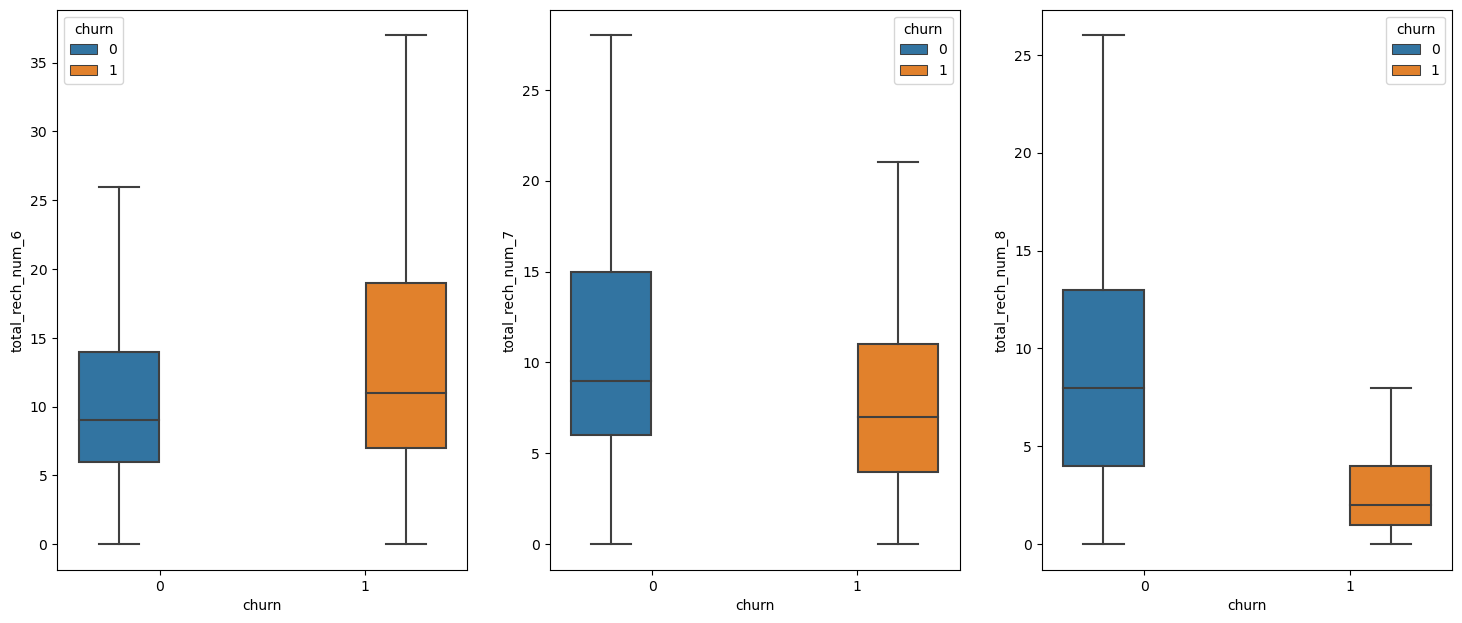

In [187]:
# Plot box charts for Total recharge for Number

plot_box_chart('total_rech_num')

##### Findings: The total recharge number decreased dramatically in the 8th month during the action phase for churned customers.

In [188]:
# Replace missing values of max_rech_data with 0

tele_high_valu.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = \
tele_high_valu.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

In [189]:
100*tele_high_valu.loc[:,Recharg_others].isnull().sum()/len(tele_high_valu)

total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
max_rech_data_6     0.0
max_rech_data_7     0.0
max_rech_data_8     0.0
dtype: float64

### A.5 Plot box charts for max_rech_data

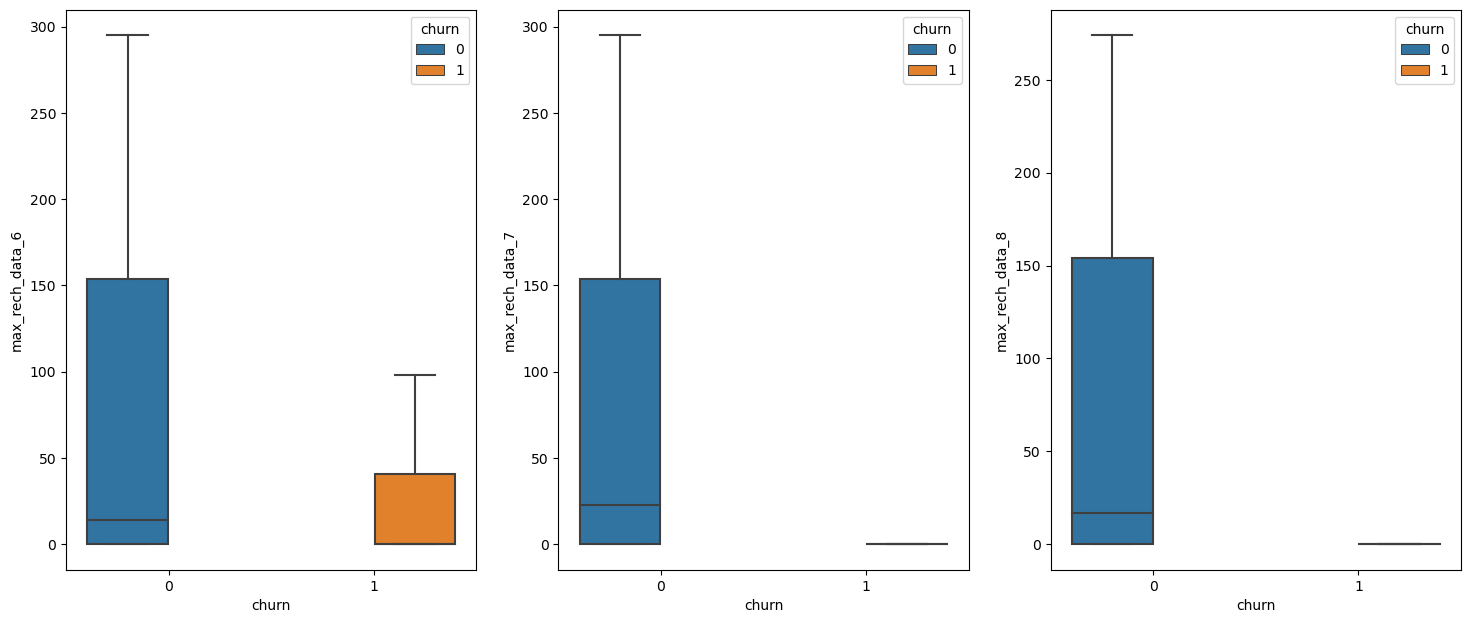

In [190]:
# Plot box charts for maximum recharge for data

plot_box_chart('max_rech_data')

##### Findings: The maximum recharge for data decreased dramatically in the 8th month during the action phase for churned customers.

In [191]:
# Extract the last day recharge amount columns

get_last_day_rech_amt = tele_high_valu.columns[tele_high_valu.columns.str.contains('day')]
print(get_last_day_rech_amt)

Index(['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'], dtype='object')


### A.6 Plot box charts for last_day_rch_amt

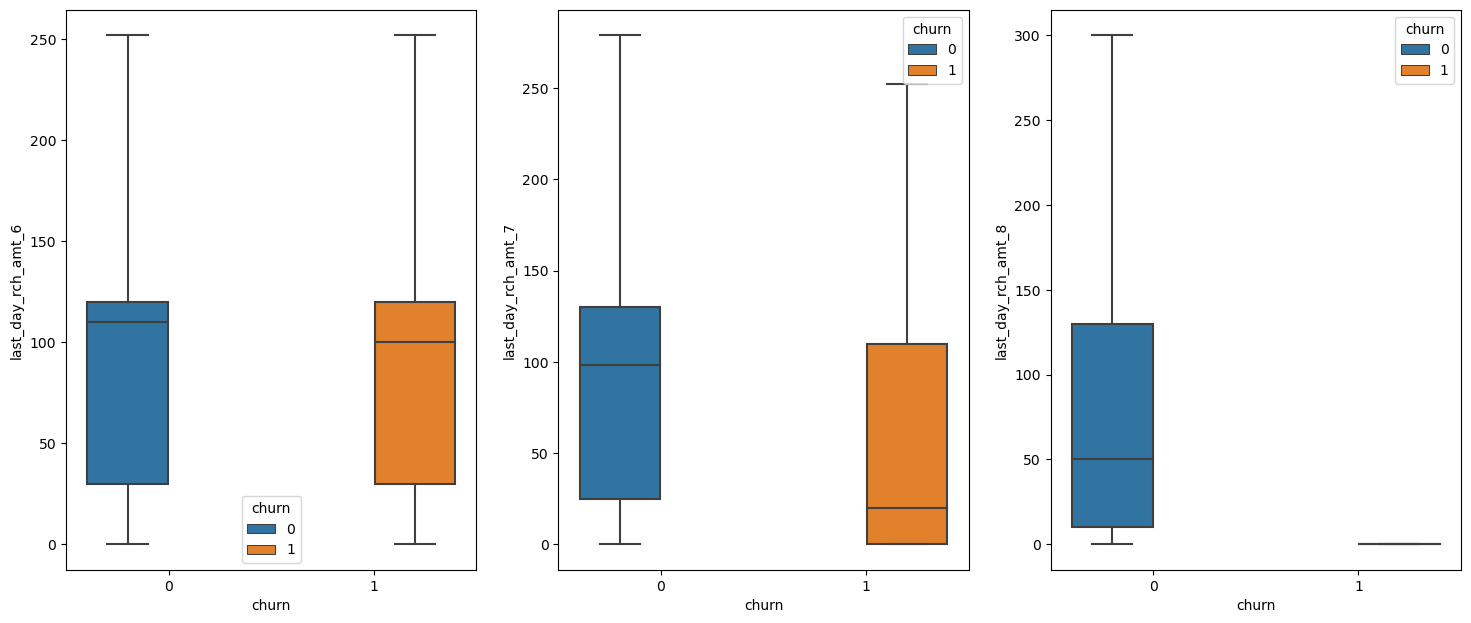

In [192]:
# Plot box charts for last day recharge amount


plot_box_chart('last_day_rch_amt')

##### Findings: The last day recharge amount decreased dramatically in the 8th month during the action phase for churned customers.

## B. check data for features related to "2G and 3G usage"

In [193]:
# Check data for 2G and 3G usage featrues

get_usage_2g_and_3g = tele_high_valu.columns[tele_high_valu.columns.str.contains('2g|3g',regex=True)]

In [194]:
# Drop the columns that have more than 49% of data missing

tele_high_valu.drop(['arpu_2g_6','arpu_2g_7','arpu_2g_8',
                     'arpu_3g_6','arpu_3g_7','arpu_3g_8',
                     'count_rech_2g_6','count_rech_2g_7',
                     'count_rech_3g_6','count_rech_3g_7'],axis=1,inplace=True)

In [195]:
tele_high_valu.shape

(20984, 157)

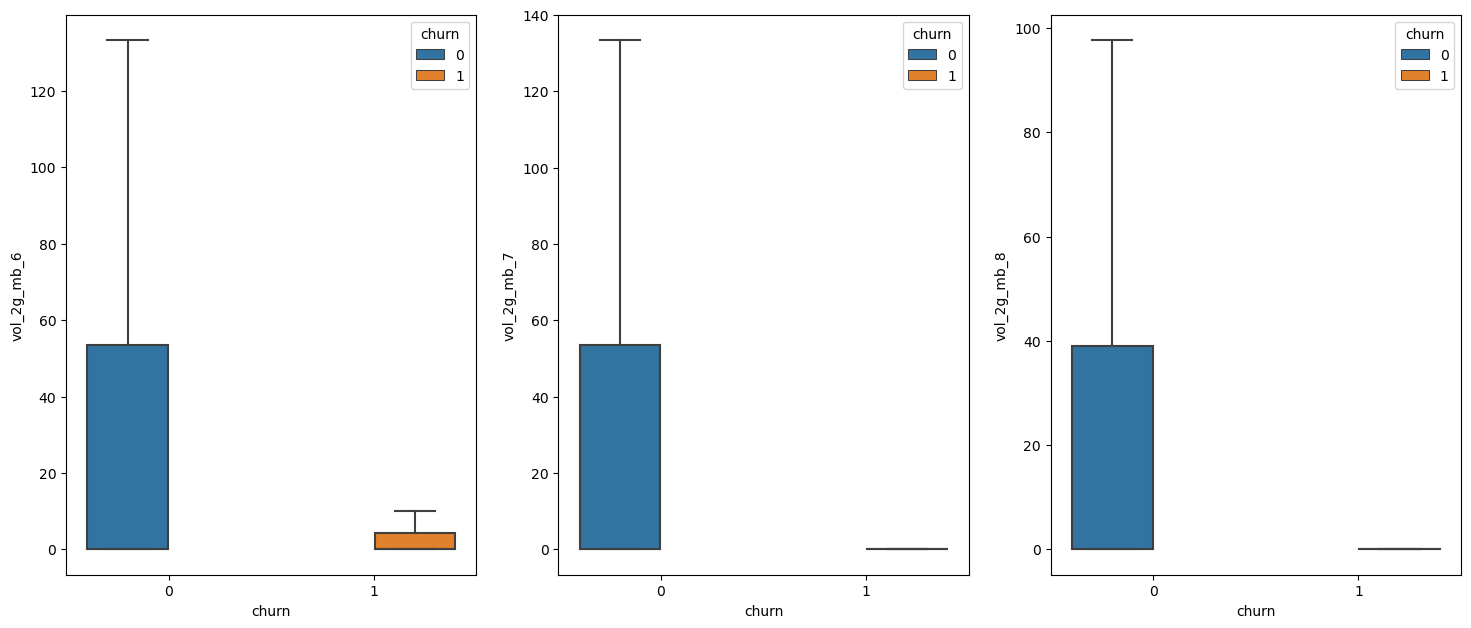

In [196]:
# Plot box charts for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

### B.1 Plot box charts for vol_2g_mb

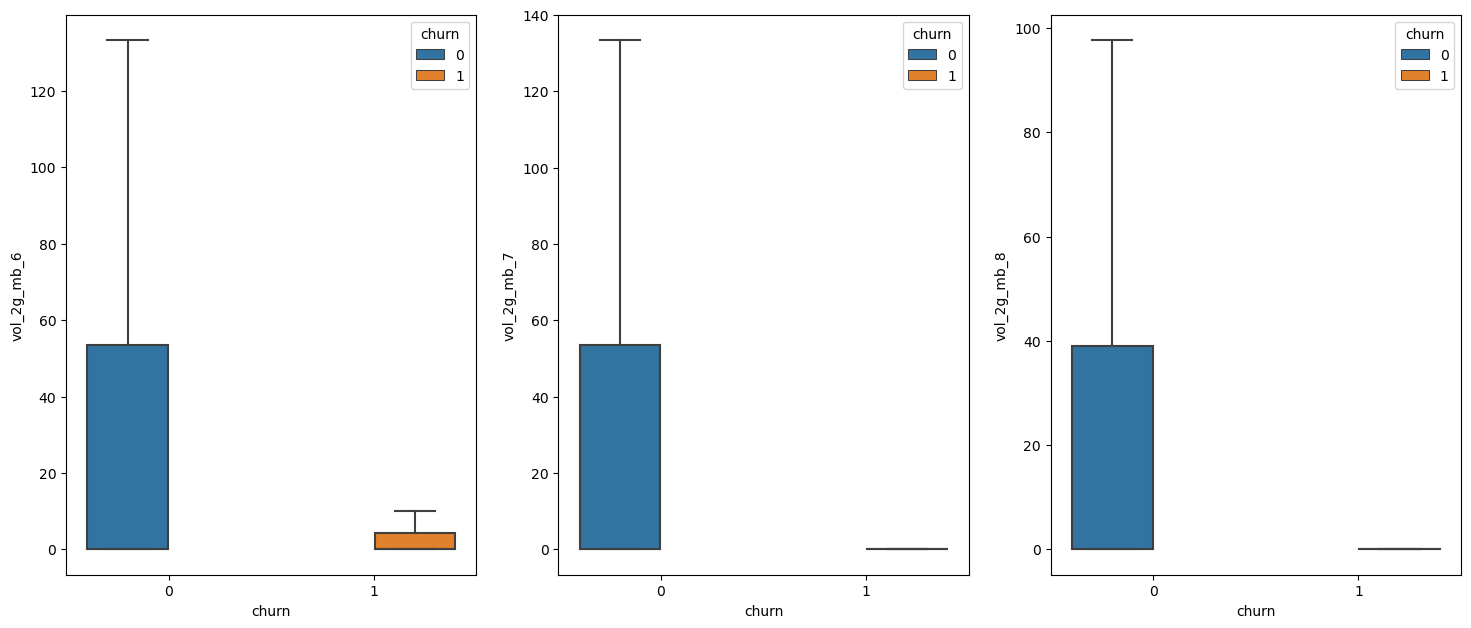

In [197]:
# Plot box charts for volume of 2G and 3G usage features:
plot_box_chart('vol_2g_mb')

### B.2 Plot box charts for vol_3g_mb

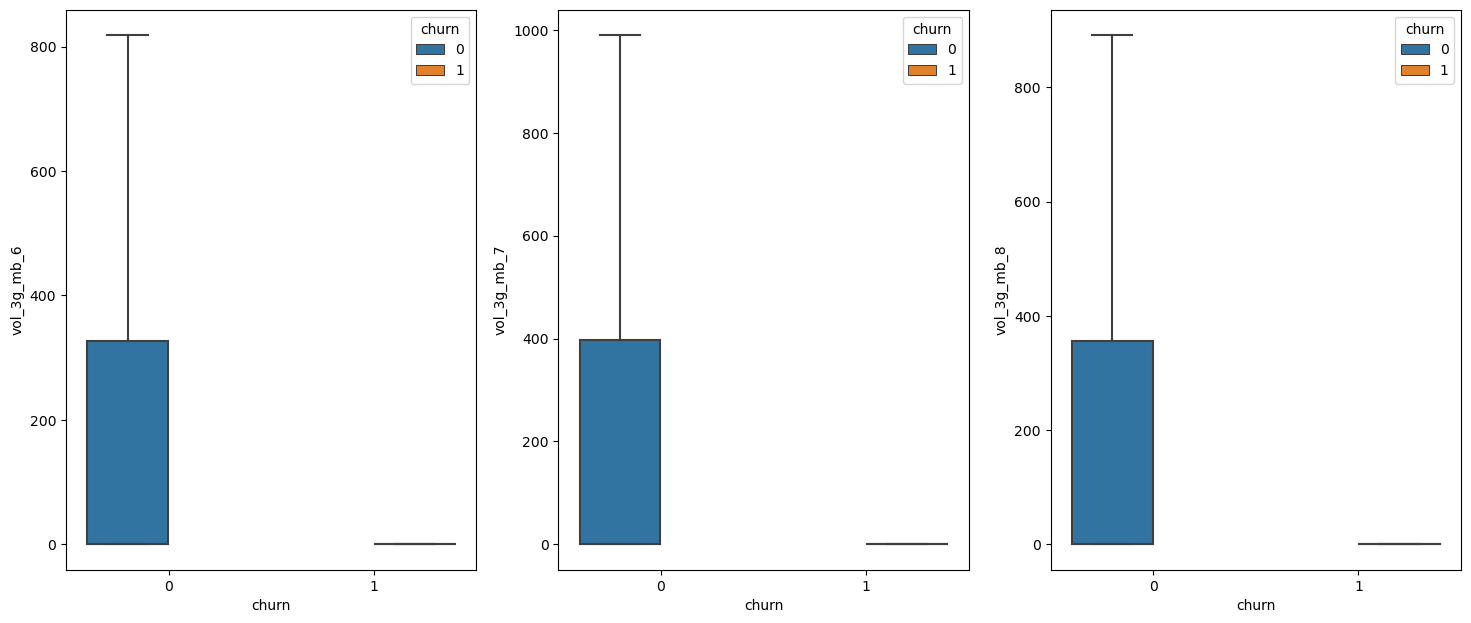

In [198]:
# Plot box charts for volume of 2G and 3G usage features:
plot_box_chart('vol_3g_mb')

##### Finding 1: Both the amounts of 2G and 3G usages for churned customers decreased in 8th month. Also the 2G and 3G usage have huge different between churned and non-churned customers. There might be some unknown reasons for that or the churned ones don't need to use it. 

##### Finding 2: Also there were more than 40% values not available for the count of recharge and the average revenue for 2G/3G per user. They might not use them so there were not data there. 

In [199]:
# Check data for the monthly services for 2G/3G 

monthly_subcription_2g_3g = tele_high_valu.columns[tele_high_valu.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [200]:
# Check the missing/Null values for 2g/3g

100*tele_high_valu.loc[:,monthly_subcription_2g_3g].isnull().sum()/len(tele_high_valu.loc[:,monthly_subcription_2g_3g])

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

In [201]:
# Check monthly subscription for 2g/3g

tele_high_valu[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20984 entries, 12 to 69997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  20984 non-null  int64
 1   monthly_2g_7  20984 non-null  int64
 2   monthly_2g_8  20984 non-null  int64
 3   monthly_3g_6  20984 non-null  int64
 4   monthly_3g_7  20984 non-null  int64
 5   monthly_3g_8  20984 non-null  int64
dtypes: int64(6)
memory usage: 1.1 MB


### B.3 Plot box charts for monthly_2g

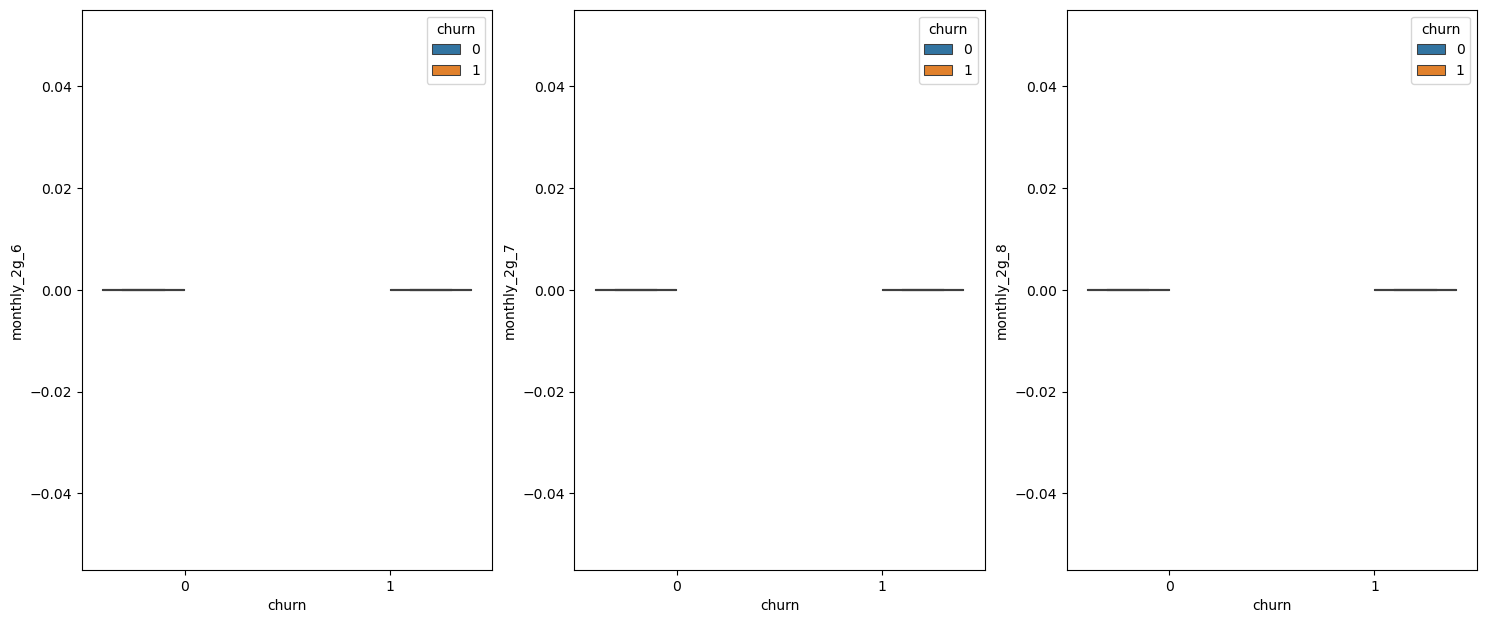

In [202]:
# Plot box charts for monthly subscription

plot_box_chart('monthly_2g')

##### Findings: The range of Values are from 1 to 2 with "0" as the majority. Thus, the graph above can't well be presented. 

In [203]:
#Plotting Bar Chart


#def plot_mean_bar_chart(df,columns_list):
#    df_0 = df[df.churn==0].filter(columns_list)
#    df_1 = df[df.churn==1].filter(columns_list)

#    mean_df_0 = pd.DataFrame([df_0.mean()],index={'Non Churn'})
#    mean_df_1 = pd.DataFrame([df_1.mean()],index={'Churn'})

#    frames = [mean_df_0, mean_df_1]
#    mean_bar = pd.concat(frames)

#    mean_bar.T.plot.bar(figsize=(10,5),rot=0)
#    plt.show()
    
#    return mean_bar

In [204]:
## Plot box charts for monthly 2g and 3g

#plot_mean_bar_chart(tele_high_valu, monthly_subcription_2g_3g)

## C. check data for features related to "volume based cost usage"

In [205]:
vbc_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('vbc_',regex=True)]
vbc_cols.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g']

In [206]:
# Rename the "volume based cost usage" (vbc) features into _6, _7, and _8 format

tele_high_valu.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

In [207]:
# Identify and list the VBC features

vbc_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('vbc_3g',regex=True)]
vbc_cols.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

### C.1 Plot box charts for vbc_3g

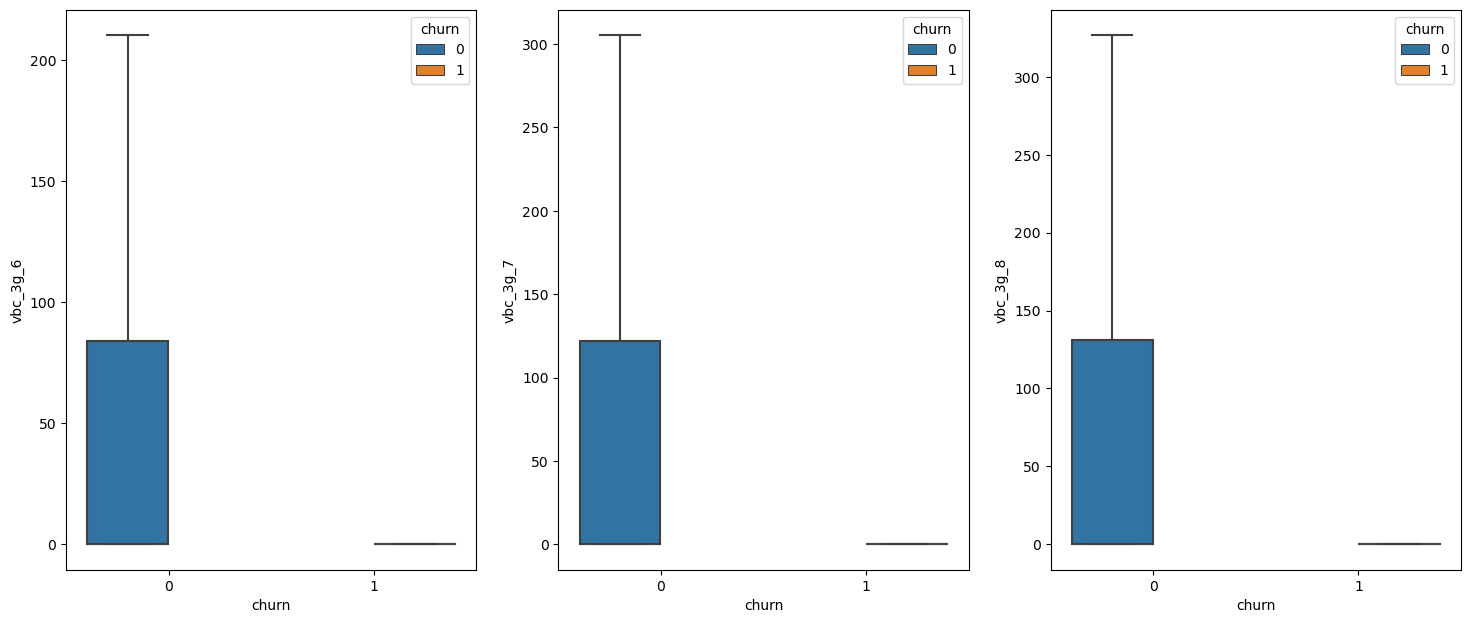

In [208]:
# Plot box charts for volume based cost 

plot_box_chart('vbc_3g')

In [209]:
#plot_mean_bar_chart(tele_high_valu, vbc_cols)

##### Findings: The volume based cost usage for churned customers were significantly lower then the one for non-churned ones. 

In [210]:
# Check Service schemes with validity smaller than a month for 2G/3G

sachet_2g_or_3g_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('sachet_2g|sachet_3g',regex=True)]


In [211]:
#plot_mean_bar_chart(tele_high_valu, sachet_2g_or_3g_cols)

##### Findings: We can see the drop in sachet services in 8th month for churned cutsomers

## D. check data for features related to "Average Revenue Per User (ARPU)"

In [212]:
# Checking columns for average revenue per user

arpu_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('arpu_')]

### D.1 Plot box charts for vbc_3g

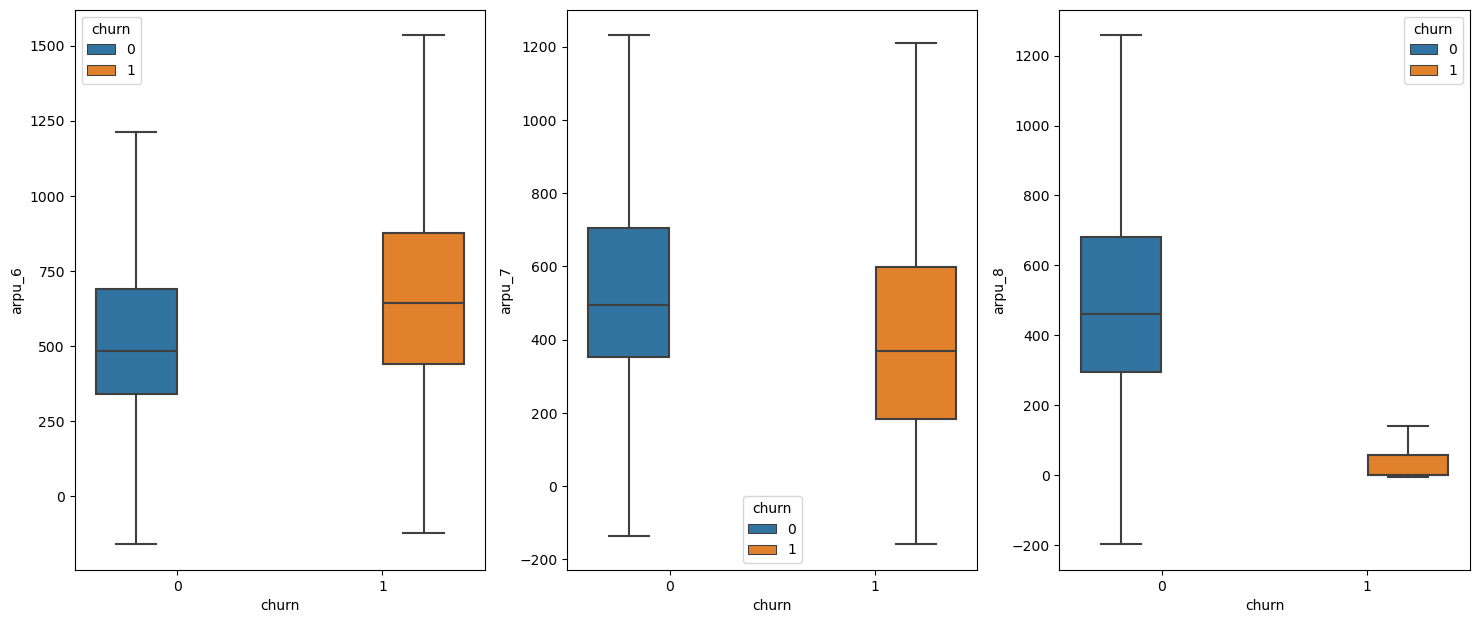

In [213]:
# Plotting arpu
plot_box_chart('arpu')

In [214]:
#plot_mean_bar_chart(tele_high_valu, arpu_cols)

##### Findings: It's clear that the ARPU in 8th month droped dramatically for churned customers

## E. check data for features related to "minutes of usage - voice calls"

In [215]:
# Identify the features about MOU (Minutes of usage - voice calls)
 
mou_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('mou')]

In [216]:
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6',
       'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7',
       'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8',
       'loc_ic_t2t_mo

##### Findings: all "Minutes of usage - voice calls" columns has the maximal 3.91 % of missing. Those blank means that the customers didn't use that particular type of calls. Thus, zeros will be filled in the missing values.

In [217]:
# replace null values with "0" for "Minutes of usage - voice calls"

tele_high_valu.loc[:,mou_cols] = tele_high_valu.loc[:,mou_cols].replace(np.NaN,0)

In [218]:
# Identify all features with OG (Outgoing calls) and MOU

mou_og_cols_6 = tele_high_valu.columns[tele_high_valu.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [219]:
# get summary for features with OG and MOU

tele_high_valu.loc[:,mou_og_cols_6].describe()

,roam_og_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,total_og_mou_6
count,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000
mean,28.558768,88.412276,170.866712,6.647443,1.549121,265.934996,177.757522,192.617813,1.894971,372.274326,2.383451,5.842503,647.098117
std,121.136006,233.410894,249.214341,20.571314,6.563695,380.845586,411.211260,412.078561,12.622126,612.028902,53.090602,19.016429,682.983177
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,6.137500,24.380000,0.000000,0.000000,41.290000,0.000000,0.000000,0.000000,1.750000,0.000000,0.000000,176.330000
50%,0.000000,28.040000,86.960000,0.260000,0.000000,140.875000,6.020000,24.200000,0.000000,73.010000,0.000000,0.160000,464.255000
75%,0.000000,83.132500,221.032500,4.765000,0.000000,350.777500,140.250000,182.682500,0.000000,535.937500,0.000000,5.015000,885.795000
max,3775.110000,6431.330000,4696.830000,617.580000,271.440000,10643.380000,7366.580000,8314.760000,628.560000,8432.990000,5900.660000,1023.210000,10674.030000


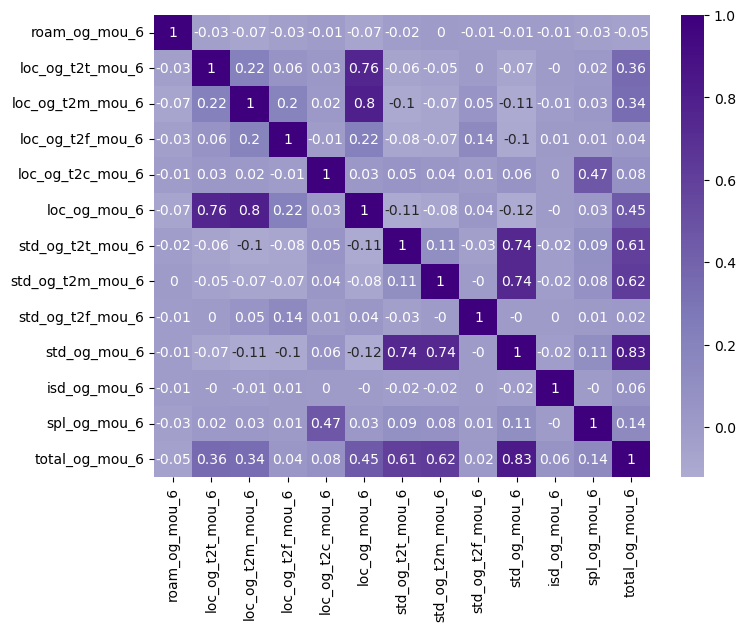

In [220]:
# Check the corelation for the features

plt.subplots(figsize = (8,6))

# Plot a heatmap of the numerical features

sns.heatmap(round(tele_high_valu.filter(mou_og_cols_6).corr(),2), cmap='Purples' , annot=True, center = 0)
plt.show()

In [221]:
# Drop the columns with total_og_mou|std_og_mou|loc_og_mou

all_total_og_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]

tele_high_valu.drop(all_total_og_cols,axis=1,inplace=True)

all_total_og_cols.tolist()

['loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8']

In [222]:
tele_high_valu.shape

(20984, 148)

In [223]:
# Check the data with "incoming mou" features

mou_ic_cols_6 = tele_high_valu.columns[tele_high_valu.columns.str.contains('.*_ic_.*mou_6',regex=True)]

mou_ic_cols_6

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')

In [224]:
tele_high_valu.loc[:,mou_ic_cols_6].describe()

,roam_ic_mou_6,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6
count,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.000000,20984.00000,20984.000000,20984.000000,20984.000000,20984.000000
mean,16.611307,66.864156,153.497267,15.755854,236.127060,15.217241,30.273796,2.91167,48.406447,296.683751,0.063772,10.848323
std,77.514092,158.017983,215.644988,45.059876,309.688761,70.835910,95.300274,21.05211,131.480014,357.918139,0.200656,76.904438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.090000,30.660000,0.000000,51.960000,0.000000,0.030000,0.00000,1.600000,80.690000,0.000000,0.000000
50%,0.000000,26.560000,88.225000,2.030000,142.190000,0.630000,5.830000,0.00000,12.885000,194.100000,0.000000,0.000000
75%,0.000000,70.040000,194.345000,12.710000,305.220000,9.195000,25.390000,0.20000,43.980000,381.832500,0.000000,0.000000
max,2613.310000,4363.960000,4450.740000,1373.090000,7454.630000,3038.340000,3613.980000,1351.11000,3929.240000,7716.140000,19.760000,6789.410000


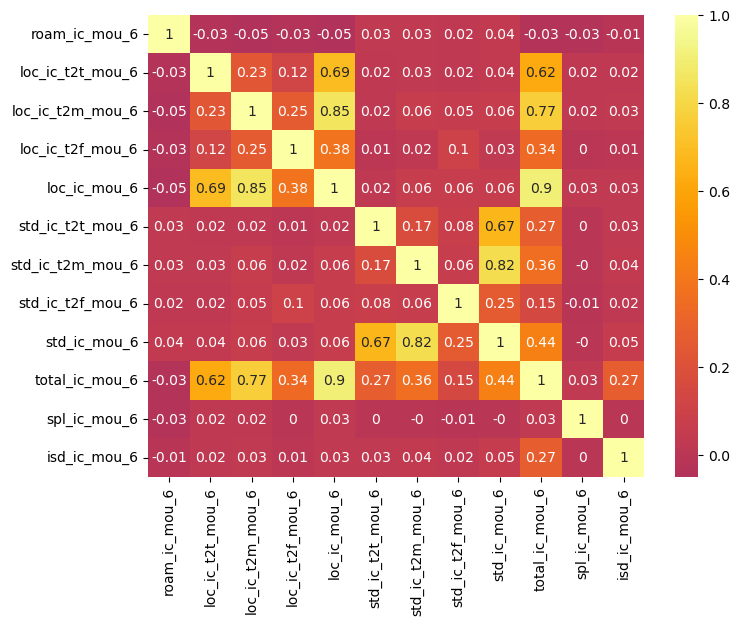

In [225]:
#Checking the corelation

plt.subplots(figsize = (8,6))

#Plotting heatmap of numerical features

sns.heatmap(round(tele_high_valu.filter(mou_ic_cols_6).corr(),2), cmap='inferno' , annot=True, center = 0)
plt.show()

##### Findings: The total_ic_mou_6, std_ic_mou_6 and loc_ic_mou_6 looks having stronger correlation with other feauters. Thus, further analyses are needed to check if any multicolinearity exists.

In [226]:
# Drop the columns with total_ic_mou|std_ic_mou|loc_ic_mou

all_total_ic_cols = tele_high_valu.columns[tele_high_valu.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]

tele_high_valu.drop(all_total_ic_cols,axis=1,inplace=True)

all_total_ic_cols.tolist()

['loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8']

In [227]:
tele_high_valu.shape

(20984, 139)

## F. check data for features related to "Offnet Usage"

In [228]:
# Identify the featueres with "offnet.*mou"

offnet_usage_service_col = tele_high_valu.columns[tele_high_valu.columns.str.contains('offnet.*mou',regex=True)]

offnet_usage_service_col

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

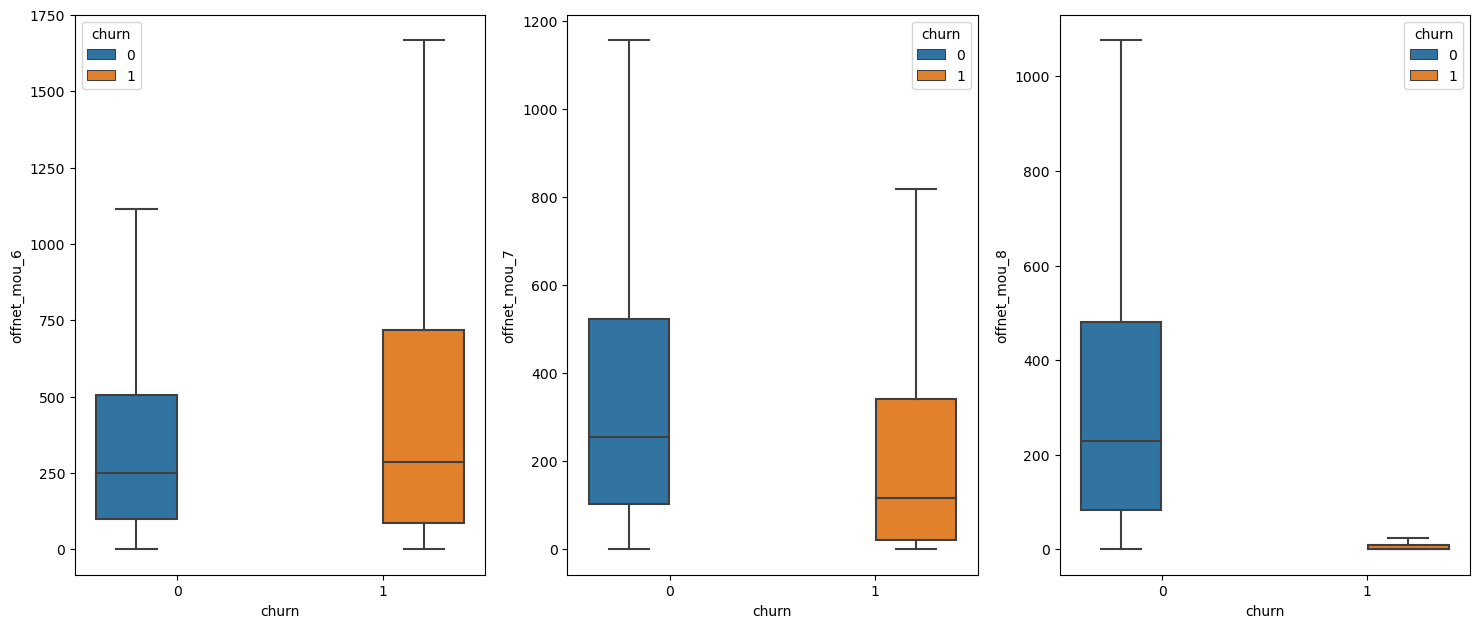

In [229]:
# Offnet mou values for churned and non churned customers
plot_box_chart('offnet_mou')

In [230]:
#plot_mean_bar_chart(tele_high_valu, offnet_usage_service_col)

##### Findings: It is clear that the offnet mou services in the 8th month decreased dramatically. 

## G. check data for features related to "ONNET: All kind of calls within the same operator network" 

In [231]:
# Identify the features related to the minutes of usage

onnet_usage_service =  tele_high_valu.columns[tele_high_valu.columns.str.contains('^onnet.*mou',regex=True)]

In [232]:
onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

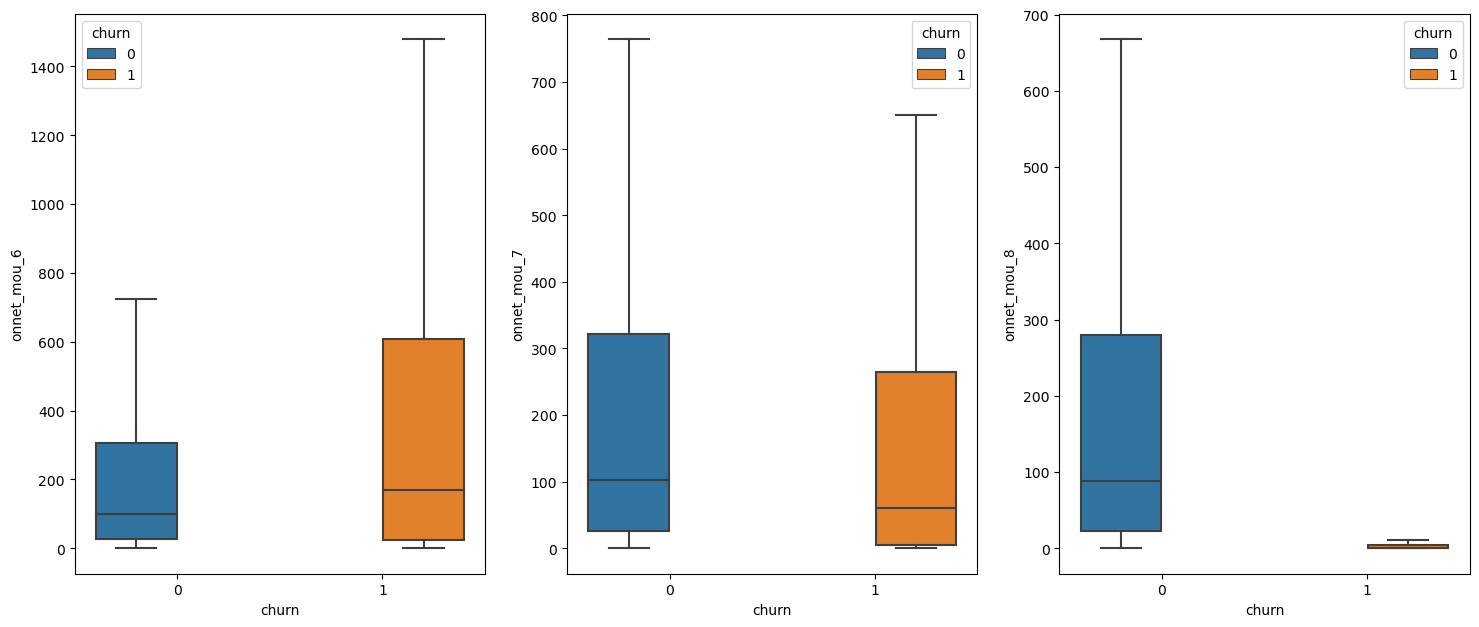

In [233]:
# Plotting offnet
plot_box_chart('onnet_mou')

In [234]:
#plot_mean_bar_chart(tele_high_valu, onnet_usage_service)

##### Findings: It is clear that the Onnet usage services in the 8th month decreased dramatically. 

## I. check data for tenure analysis 

In [235]:
tenure_valu = tele_high_valu.copy()

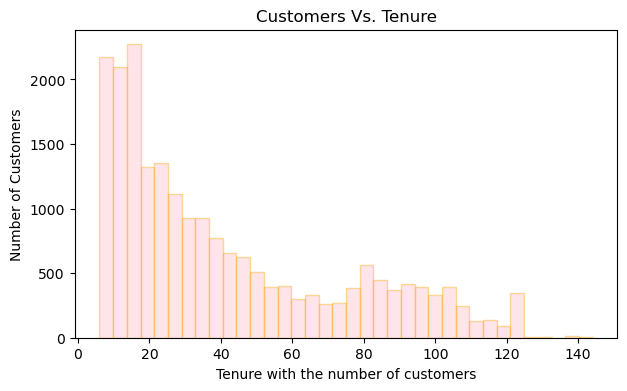

In [236]:
plt.figure(figsize=(7,4))
# aon (Age on network) --> number of days the customer is using the operator T network

tenure_valu['tenure'] = tenure_valu['aon']/30
tenure_valu['tenure'].head()
ax = sns.distplot(tenure_valu['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'pink', 
             hist_kws={'edgecolor':'orange'},
             kde_kws={'linewidth': 6})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure with the number of customers')
ax.set_title('Customers Vs. Tenure')
plt.show()

In [237]:
# create categories for the tenure feature
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_valu['tenure_range'] = pd.cut(tenure_valu['tenure'], tn_range, labels=tn_label)

tenure_valu['tenure_range'].head()

12    6-12 Months
15        1-2 Yrs
23        1-2 Yrs
24        2-5 Yrs
27        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

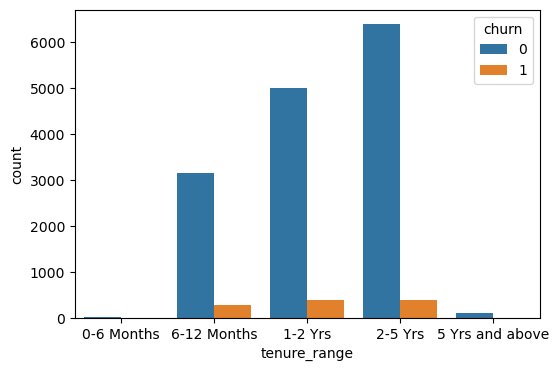

In [238]:
# Plot the newly created ones

plt.figure(figsize=(6,4))
sns.countplot(x = 'tenure_range', hue = 'churn',data = tenure_valu,palette=("tab10"))
plt.show()

#### Checking the columns having more than 30% of NA values.

In [239]:
100*tele_high_valu.isnull().mean().sort_values(ascending=False)

count_rech_3g_8             51.725124
night_pck_user_8            51.725124
date_of_last_rech_data_8    51.725124
count_rech_2g_8             51.725124
fb_user_8                   51.725124
                              ...    
isd_og_mou_6                 0.000000
std_og_t2c_mou_8             0.000000
std_og_t2f_mou_8             0.000000
std_og_t2f_mou_7             0.000000
churn                        0.000000
Length: 139, dtype: float64

In [240]:
# create a list of the columns with higher missing values ready for removal

high_miss_cols_for_remv=[]
for i in tele_high_valu.columns:
    if(tele_high_valu[i].isnull().mean()*100>=30.00):
        high_miss_cols_for_remv.append(i)
        
print("Columns below will be removed from the dataset :\n")
print(high_miss_cols_for_remv)

Columns below will be removed from the dataset :

['date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'count_rech_2g_8', 'count_rech_3g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [241]:
tele_high_valu.shape

(20984, 139)

In [242]:
# Remove the listed columns above

tele_high_valu.drop(high_miss_cols_for_remv,axis=1,inplace=True)

# verifying the shape of the dataset

tele_high_valu.shape 

(20984, 128)

In [243]:
tele_high_valu.drop(['max_rech_data_8'], axis=1,inplace=True)

In [244]:
tele_high_valu.shape

(20984, 127)

In [245]:
numberic_col = [ 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

In [246]:
# Replace the NaN values with zero for all numeric features

for i in numberic_col:
    tele_high_valu.loc[tele_high_valu[i].isnull(),i]=0

In [247]:
# check the results 

100*tele_high_valu.isnull().mean().sort_values(ascending=False)

og_others_8             3.678994
ic_others_8             3.678994
date_of_last_rech_8     1.906214
last_date_of_month_8    0.519443
date_of_last_rech_7     0.328822
                          ...   
std_og_t2f_mou_8        0.000000
std_og_t2f_mou_7        0.000000
std_og_t2f_mou_6        0.000000
std_og_t2m_mou_8        0.000000
churn                   0.000000
Length: 127, dtype: float64

#### 3.3 Outliers handling <a id='out'>

The box plots of these features show there a lot of outliers. These can be capped with k-sigma method.

In [248]:
def cap_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [249]:
tele_high_valu.head(10)

,id,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,tot_avg_rech_amnt_6n7_goodPh,churn
12,12,2014-08-31,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,...,322,0.00,0.00,0.00,0,0.0,0.0,0.0,469.5,0
15,15,2014-08-31,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,...,602,0.00,0.00,0.00,0,155.0,0.0,155.0,604.5,0
23,23,2014-08-31,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,...,455,0.00,0.00,0.00,0,0.0,0.0,0.0,1205.0,0
24,24,2014-08-31,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,...,1219,0.00,0.00,0.00,0,24.0,48.0,24.0,469.5,0
27,27,2014-08-31,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,...,573,700.40,185.71,173.72,0,209.0,306.0,217.0,826.0,0
33,33,2014-08-31,438.077,0.000,213.781,0.00,0.00,0.00,0.00,0.00,...,457,0.00,0.00,0.00,1,506.0,0.0,253.0,505.5,0
39,39,2014-08-31,348.187,630.031,974.914,64.66,598.74,565.66,37.83,339.28,...,622,0.00,0.00,0.00,0,310.0,155.0,429.0,814.5,0
45,45,2014-08-31,1361.775,1658.481,1317.325,872.16,546.06,1078.93,410.56,420.19,...,942,132.74,287.81,265.40,0,126.0,215.0,42.0,2092.5,0
49,49,2014-08-31,396.336,681.418,556.464,119.06,198.08,179.56,537.26,1059.59,...,255,0.00,0.00,0.00,0,0.0,0.0,0.0,611.0,0
52,52,2014-08-31,511.711,395.991,432.337,800.44,532.08,690.84,167.06,176.14,...,826,0.00,0.00,0.00,0,0.0,0.0,0.0,505.0,0


In [250]:
#tele_high_valu = tele_high_valu.apply(cap_outliers, axis=0)

#plt.figure(figsize=(15,8))
#plt.xticks(rotation=45)
#sns.boxplot(data = tele_high_valu)

# 4. Feature Engineering and Variable Transformation <a id='fea'>

Let's understand feature importances for raw features as well as components to decide top features for modelling.

## Derive  and form new features.

In [251]:
df_final_tele = tele_high_valu.copy()

print(df_final_tele.shape)
df_final_tele.info()
df_final_tele.head()

(20984, 127)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 20984 entries, 12 to 69997
Columns: 127 entries, id to churn
dtypes: datetime64[ns](4), float64(95), int64(28)
memory usage: 20.5 MB


,id,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,churn_probability,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,tot_avg_rech_amnt_6n7_goodPh,churn
12,12,2014-08-31,439.919,397.946,392.024,244.46,108.31,42.98,571.98,727.91,...,322,0.0,0.00,0.00,0,0.0,0.0,0.0,469.5,0
15,15,2014-08-31,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,...,602,0.0,0.00,0.00,0,155.0,0.0,155.0,604.5,0
23,23,2014-08-31,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,...,455,0.0,0.00,0.00,0,0.0,0.0,0.0,1205.0,0
24,24,2014-08-31,371.974,352.069,240.449,93.18,38.29,29.86,531.19,507.76,...,1219,0.0,0.00,0.00,0,24.0,48.0,24.0,469.5,0
27,27,2014-08-31,390.489,350.985,421.300,8.58,11.48,12.68,133.16,158.73,...,573,700.4,185.71,173.72,0,209.0,306.0,217.0,826.0,0


In [252]:
df_final_tele.drop(["tot_avg_rech_amnt_6n7_goodPh"],axis=1,inplace=True)

df_final_tele.drop(tele_high_valu.filter(regex='date_').columns,axis=1,inplace=True)
print (df_final_tele.shape)

col_list = df_final_tele.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final_tele[avg_col_name] = (df_final_tele[col_6]  + df_final_tele[col_7])/ 2

(20984, 122)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [253]:
col_list_to_drop = df_final_tele.filter(regex='_6|_7')
df_final_tele.drop(col_list_to_drop,axis=1,inplace=True)
print (df_final_tele.shape)

(20984, 83)


In [254]:
df_final_tele.head(10)

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
12,12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,...,77.0,77.0,130.210,0.000,0.5,0.0,0.0,0.0,0.000,77.5
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,...,23.0,34.5,0.020,0.000,0.0,1.5,0.0,0.0,0.000,36.0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,...,153.0,254.5,49.460,325.040,0.5,2.0,0.0,0.5,179.715,257.5
33,33,213.781,0.00,2.68,0.0,0.0,0.00,0.00,0.00,2.68,...,252.5,252.5,0.000,378.235,0.0,0.0,0.5,0.0,0.000,253.0
39,39,974.914,565.66,558.59,0.0,0.0,20.94,12.91,0.00,0.00,...,154.0,231.0,1598.305,0.000,1.5,0.0,0.0,0.0,0.000,232.5
45,45,1317.325,1078.93,225.53,0.0,0.0,69.71,165.78,1.18,0.18,...,43.5,166.5,80.545,393.255,0.0,0.5,0.0,3.5,276.605,170.5
49,49,556.464,179.56,967.99,0.0,0.0,8.98,10.44,0.00,0.24,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
52,52,432.337,690.84,207.69,0.0,0.0,54.68,157.98,0.53,0.00,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0


In [255]:
df_final_tele.columns

Index(['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'churn_probability', 'total_rech_amt_data_8', 'churn',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_a

##### Findings: The number of features were redcued because most of the columns related to month 6 & 7 were merged. By doing so, the number of the fetures is greatly reduced from 124 to 84.

#### 3.1. Data split: Create X, y and then Train test split <a id='tra'>

Lets create X and y datasets and skip "circle_id" since it has only 1 unique value

# 5. Model building <a id = 'mod1'> 

In [256]:
## condcut PCA : Principal Component Analysis
!pip install imbalanced-learn==0.11.0
!pip install -U scikit-learn

In [257]:

from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import IncrementalPCA

def split_data(df):
    Y = df["churn"]
    X = df.drop(["churn"],axis=1)
    return X,Y
    
def scale_all_data(X):
    scaler = StandardScaler()
    X_cols_ = X.columns
    X_scaled = scaler.fit_transform(X)
    X_scale_final = pd.DataFrame(X_scaled, columns=X_cols_)
    print("Scaling the data ....")
    return X_scale_final

def scree_plot_PCA(X):
    pca = PCA(svd_solver='randomized', random_state=101)
    pca.fit(X)
    fig = plt.figure(figsize = (6,4))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel('number of components')
    plt.ylabel('cumulative explained variance')
    plt.show()
    return pca

In [258]:
pca_df_telecom = df_final_tele.copy()
pca_df_telecom.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
12,12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,...,77.0,77.0,130.21,0.00,0.5,0.0,0.0,0.0,0.000,77.5
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,...,23.0,34.5,0.02,0.00,0.0,1.5,0.0,0.0,0.000,36.0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,...,153.0,254.5,49.46,325.04,0.5,2.0,0.0,0.5,179.715,257.5


In [259]:
# Split data for x and y

X,Y=split_data(pca_df_telecom)

In [260]:
X.head()

,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
12,12,392.024,42.98,644.43,0.0,0.0,3.98,51.24,0.00,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
15,15,338.286,194.43,197.09,0.0,0.0,194.43,185.88,4.94,0.00,...,77.0,77.0,130.21,0.00,0.5,0.0,0.0,0.0,0.000,77.5
23,23,479.762,0.89,386.91,0.0,0.0,0.89,378.01,8.88,0.00,...,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.000,0.0
24,24,240.449,29.86,222.03,0.0,0.0,29.86,99.86,0.00,0.36,...,23.0,34.5,0.02,0.00,0.0,1.5,0.0,0.0,0.000,36.0
27,27,421.300,12.68,182.83,0.0,0.0,12.68,157.23,25.59,0.00,...,153.0,254.5,49.46,325.04,0.5,2.0,0.0,0.5,179.715,257.5


In [261]:
Y.head(10)

12    0
15    0
23    0
24    0
27    0
33    0
39    0
45    0
49    0
52    0
Name: churn, dtype: int64

## Show the distribution % for churn vs non-churn cutomers

In [262]:
print("The percenatge of Churned Customer is : "+str(round(100*Y.sum()/len(Y),2))+" % ")

The percenatge of Churned Customer is : 5.47 % 


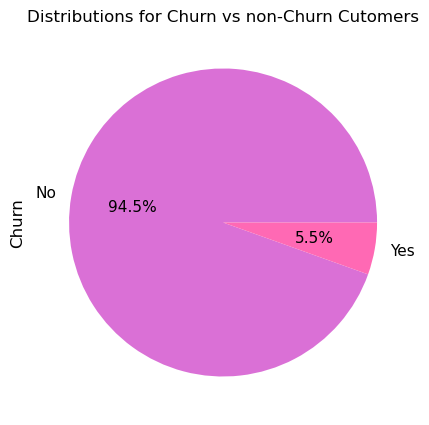

In [263]:
# create a pie chart for Churn Distribution

# Create a set of colors
mycolors=[ # matplotlib named colors 
        'orchid', "hotpink", 'tomato', 'gold', 'cornflowerblue', 'green', '#B7C3F3',  '#DD7596','#8EB897', '#4F6272',
           # any color using the color codes
         "black", "b", "#4CAF50", "#77BFE2"]
         
pie_chart = pca_df_telecom['churn'].value_counts()*100.0 /len(pca_df_telecom)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 11 , colors = mycolors)                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Distributions for Churn vs non-Churn Cutomers', fontsize = 12)



plt.show()

#### 3.4 Feature scaling <a id ='sca'>

#### Scale all features with a normalization scaling

In [264]:
X_scaled = scale_all_data(X) 

print(X_scaled.shape) 

X_scaled.head(10)

Scaling the data ....
(20984, 82)


,id,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,-1.741335,-0.254323,-0.437773,0.614531,-0.167619,-0.190201,-0.328977,-0.463071,-0.319299,-0.235883,...,-0.734751,-0.679548,-0.376848,-0.401420,-0.463536,-0.368311,-0.393106,-0.207546,-0.413242,-0.682782
1,-1.741186,-0.358685,-0.114965,-0.326099,-0.167619,-0.190201,0.476813,0.126022,-0.065164,-0.235883,...,-0.000637,-0.263219,0.068408,-0.401420,0.820536,-0.368311,-0.393106,-0.207546,-0.413242,-0.266345
2,-1.740788,-0.083930,-0.527486,0.073039,-0.167619,-0.190201,-0.342050,0.966652,0.137527,-0.235883,...,-0.734751,-0.679548,-0.376848,-0.401420,-0.463536,-0.368311,-0.393106,-0.207546,-0.413242,-0.682782
3,-1.740739,-0.548691,-0.465738,-0.273658,-0.167619,-0.190201,-0.219479,-0.250343,-0.319299,-0.184745,...,-0.515470,-0.493011,-0.376780,-0.401420,-0.463536,0.329829,-0.393106,-0.207546,-0.413242,-0.489341
4,-1.740590,-0.197467,-0.502356,-0.356084,-0.167619,-0.190201,-0.292167,0.000669,0.997164,-0.235883,...,0.723943,0.696500,-0.207719,-0.024537,0.820536,0.562542,-0.393106,0.332660,0.043126,0.700864
5,-1.740292,-0.600482,-0.529383,-0.734889,-0.167619,-0.190201,-0.345816,-0.687262,-0.319299,0.144814,...,1.672571,0.685687,-0.376848,0.037142,-0.463536,-0.368311,0.495405,-0.207546,-0.413242,0.676684
6,-1.739994,0.877687,0.676295,0.434033,-0.167619,-0.190201,-0.257219,-0.630777,-0.319299,-0.235883,...,0.733477,0.569439,5.088592,-0.401420,3.388681,-0.368311,-0.393106,-0.207546,-0.413242,0.566529
7,-1.739696,1.542671,1.770306,-0.266298,-0.167619,-0.190201,-0.050875,0.038078,-0.258595,-0.210314,...,-0.320024,0.220696,-0.101423,0.054557,-0.463536,-0.135598,-0.393106,3.573899,0.289168,0.233379
8,-1.739497,0.065030,-0.146660,1.294886,-0.167619,-0.190201,-0.307822,-0.641584,-0.319299,-0.201791,...,-0.734751,-0.679548,-0.376848,-0.401420,-0.463536,-0.368311,-0.393106,-0.207546,-0.413242,-0.682782
9,-1.739348,-0.176032,0.943110,-0.303810,-0.167619,-0.190201,-0.114466,0.003951,-0.292034,-0.235883,...,-0.734751,-0.679548,-0.376848,-0.401420,-0.463536,-0.368311,-0.393106,-0.207546,-0.413242,-0.682782


In [265]:
# Replacing the NaN with 0

X_scaled=X_scaled.replace(np.nan,0)


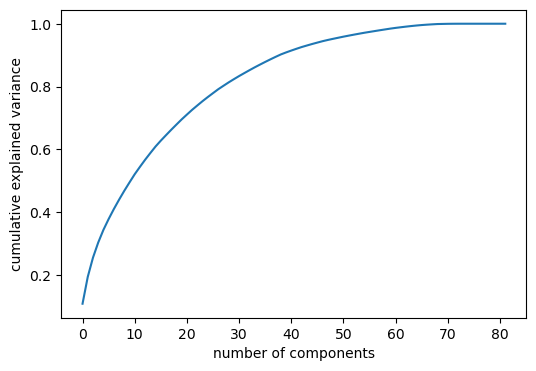

,PC1,PC2,PC3,PC4,Features
0,0.003295,0.003640,-0.005005,-0.003237,id
1,0.049261,0.319631,0.113330,0.013941,arpu_8
2,-0.082087,0.138639,0.149792,0.120683,onnet_mou_8
3,-0.067617,0.229695,0.075803,-0.081234,offnet_mou_8
4,0.000553,0.043895,0.004392,0.085969,roam_ic_mou_8


In [266]:
# Get a scree plot for four components

pca = scree_plot_PCA(X_scaled) 
col = list(X_scaled.columns)
df_pca_PC = \
pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2], 'PC4':pca.components_[3],'Features':col})
df_pca_PC.head()

In [267]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.93,  19.47,  25.59,  30.38,  34.42,  37.86,  41.04,  44.02,
        46.85,  49.52,  52.13,  54.47,  56.74,  58.88,  60.96,  62.81,
        64.55,  66.27,  67.93,  69.57,  71.1 ,  72.61,  74.  ,  75.37,
        76.67,  77.92,  79.15,  80.25,  81.34,  82.36,  83.35,  84.29,
        85.22,  86.13,  87.  ,  87.85,  88.67,  89.47,  90.24,  90.88,
        91.48,  92.05,  92.6 ,  93.09,  93.57,  94.02,  94.46,  94.85,
        95.21,  95.56,  95.91,  96.23,  96.54,  96.84,  97.14,  97.41,
        97.68,  97.95,  98.21,  98.47,  98.7 ,  98.9 ,  99.1 ,  99.28,
        99.45,  99.6 ,  99.72,  99.82,  99.92,  99.96, 100.  , 100.02,
       100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03, 100.03,
       100.03, 100.03])

#### Findings : According to the resutls, using the 50 components will be able to explain 96% of the variance for the model. The *50* components should be enougg for the modeling.

#### Model Prediction and Evaluation

In [268]:
test_df=pd.read_csv("test.csv")

In [269]:
test_df.shape

(30000, 171)

In [270]:
pca_df_telecom.shape

(20984, 83)

In [271]:
x_train=X
y_train=Y

In [272]:
X.columns

Index(['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'churn_probability', 'total_rech_amt_data_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'av

In [273]:
# replace the NaN with 0;

test_df['total_rech_data_6'] = test_df['total_rech_data_6'].replace(np.NaN,0.0)
test_df['total_rech_data_7'] = test_df['total_rech_data_7'].replace(np.NaN,0.0)
test_df['total_rech_data_8'] = test_df['total_rech_data_8'].replace(np.NaN,0.0)
test_df['av_rech_amt_data_6'] = test_df['av_rech_amt_data_6'].replace(np.NaN,0.0)
test_df['av_rech_amt_data_7'] = test_df['av_rech_amt_data_7'].replace(np.NaN,0.0)
test_df['av_rech_amt_data_8'] = test_df['av_rech_amt_data_8'].replace(np.NaN,0.0)

# Create new columns about total recharge amount with "total_rech_amt_data" for the High Value customers in the good phase

test_df['total_rech_amt_data_6'] = test_df.av_rech_amt_data_6 + df_churn_train.total_rech_data_6
test_df['total_rech_amt_data_7'] = test_df.av_rech_amt_data_7 + df_churn_train.total_rech_data_7
test_df['total_rech_amt_data_8'] = test_df.av_rech_amt_data_8 + df_churn_train.total_rech_data_8
test_df['tot_avg_rech_amnt_6n7_goodPh'] = (test_df.total_rech_amt_6 + test_df.total_rech_amt_data_6 \
                                               + test_df.total_rech_amt_7+ test_df.total_rech_amt_data_7)/2

In [274]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 175 entries, id to tot_avg_rech_amnt_6n7_goodPh
dtypes: float64(139), int64(27), object(9)
memory usage: 40.1+ MB


In [275]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase
 
high_value_cutoff = test_df.tot_avg_rech_amnt_6n7_goodPh.quantile(0.7)
test_df_high_val_cust = test_df

In [276]:
drop_cols_w_1n2_unique_values =['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 
                          'last_date_of_month_6', 'last_date_of_month_7',
                          'std_og_t2c_mou_6', 'std_og_t2c_mou_7','std_ic_t2o_mou_6', 
                          'std_ic_t2o_mou_7']

print("The number of features before dropping features only with 1 or 2 unique values is: " + str(test_df_high_val_cust.shape[1]))
test_df_high_val_cust.drop(drop_cols_w_1n2_unique_values,axis=1,inplace=True)
print("The number of features after dropping features only with 1 or 2 unique values is: "+ str(test_df_high_val_cust.shape[1]))

The number of features before dropping features only with 1 or 2 unique values is: 175
The number of features after dropping features only with 1 or 2 unique values is: 165


In [277]:
test_df_high_val_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 165 entries, id to tot_avg_rech_amnt_6n7_goodPh
dtypes: float64(132), int64(26), object(7)
memory usage: 37.8+ MB


In [278]:
for col in df_date_cols:
    test_df_high_val_cust[col] = pd.to_datetime(test_df_high_val_cust[col])
test_df_high_val_cust.head()

,id,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,...,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,tot_avg_rech_amnt_6n7_goodPh
0,69999,2014-08-31,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,...,NaN,NaN,1692,0.00,0.00,0.00,0.0,0.0,0.0,96.5
1,70000,2014-08-31,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,...,NaN,NaN,2533,0.00,0.00,0.00,0.0,1.0,0.0,500.5
2,70001,2014-08-31,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,...,NaN,NaN,277,525.61,758.41,241.84,0.0,0.0,0.0,750.0
3,70002,2014-08-31,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,...,NaN,NaN,1244,0.00,0.00,0.00,0.0,0.0,0.0,185.0
4,70003,2014-08-31,306.854,406.289,413.329,450.93,609.03,700.68,60.94,23.84,...,NaN,NaN,462,0.00,0.00,0.00,7.0,7.0,6.0,430.0


In [279]:
# list_potential_categorical_type(get_meta_data(test_df_high_val_cust),test_df_high_val_cust)

test_df_high_val_cust.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

# Get the data for the last day recharge amount columns

get_last_day_rech_amt = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('day')]
get_last_day_rech_amt.tolist()
get_usage_2g_and_3g = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('2g|3g',regex=True)]

get_usage_2g_and_3g

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g'],
      dtype='object')

In [280]:
# Check the Volume based cost 

vbc_cols =test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('vbc_',regex=True)]
vbc_cols.tolist()

# Rename the month named vbc columns to _6, _7, _8, and _9 format

test_df_high_val_cust.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'}, inplace=True)

vbc_cols = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('vbc_3g',regex=True)]
vbc_cols.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [281]:
# Check the data validity for the service schemes smaller than a month for 2G/3G

sachet_2g_or_3g_cols = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('sachet_2g|sachet_3g',regex=True)]

# Check the columns for "average revenue per user" ARPU

arpu_cols = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('arpu_')]
mou_cols = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('mou')]
test_df_high_val_cust.loc[:,mou_cols] = test_df_high_val_cust.loc[:,mou_cols].replace(np.NaN,0)
mou_og_cols_6 = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('.*_og_.*mou_6',regex=True)]

In [282]:
all_total_og_cols = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
test_df_high_val_cust.drop(all_total_og_cols,axis=1,inplace=True)

#log("Columns dropped - ")

all_total_og_cols.tolist()
mou_ic_cols_6 = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('.*_ic_.*mou_6',regex=True)]
test_df_high_val_cust.loc[:,mou_ic_cols_6].describe()

all_total_ic_cols = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
test_df_high_val_cust.drop(all_total_ic_cols,axis=1,inplace=True)

#log("Columns dropped - ")

all_total_ic_cols.tolist()
offnet_usage_service_col = test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('offnet.*mou',regex=True)]

#minutes of usage related columns

onnet_usage_service =test_df_high_val_cust.columns[test_df_high_val_cust.columns.str.contains('^onnet.*mou',regex=True)]

onnet_usage_service

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

In [283]:
test_df_high_val_cust.shape

(30000, 147)

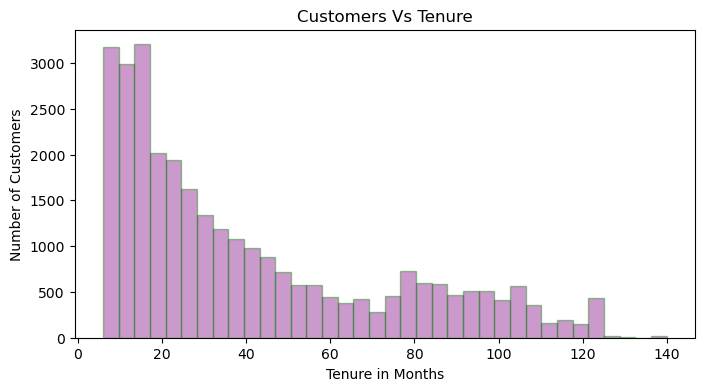

(30000, 147)
(30000, 139)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
count_rech_2g
count_rech_3g
av_rech_amt_data
vol_2g_mb
vol_3g_mb
arpu_3g
arpu_2g
night_pck_user
monthly_2g
sachet_2g
monthly_3g
sachet_3g
fb_user
vbc_3g
total_rech_amt_data


In [284]:
tenure_valu = test_df_high_val_cust.copy()
plt.figure(figsize=(8,4))

# aon --> Age on network - number of days the customer is using the operator T network

tenure_valu['tenure'] = tenure_valu['aon']/30
tenure_valu['tenure'].head()
ax = sns.distplot(tenure_valu['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'green'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('Number of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Customers Vs Tenure')
plt.show()
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
tenure_valu['tenure_range'] = pd.cut(tenure_valu['tenure'], tn_range, labels=tn_label)
tenure_valu['tenure_range'].head()

numberic_col = [ 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

test_df_final = test_df_high_val_cust.copy()
print(test_df_final.shape)
test_df_final.head(3)
test_df_final.drop(["tot_avg_rech_amnt_6n7_goodPh"],axis=1,inplace=True)
test_df_final.drop(test_df_high_val_cust.filter(regex='date_').columns,axis=1,inplace=True)
print (test_df_final.shape)

col_list = test_df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    test_df_final[avg_col_name] = (test_df_final[col_6]  + test_df_final[col_7])/ 2

In [285]:
test_x=test_df_final[['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'total_rech_amt_data_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'avg_loc_og_t2m_mou_av67',
       'avg_loc_og_t2f_mou_av67', 'avg_loc_og_t2c_mou_av67',
       'avg_std_og_t2t_mou_av67', 'avg_std_og_t2m_mou_av67',
       'avg_std_og_t2f_mou_av67', 'avg_isd_og_mou_av67', 'avg_spl_og_mou_av67',
       'avg_og_others_av67', 'avg_loc_ic_t2t_mou_av67',
       'avg_loc_ic_t2m_mou_av67', 'avg_loc_ic_t2f_mou_av67',
       'avg_std_ic_t2t_mou_av67', 'avg_std_ic_t2m_mou_av67',
       'avg_std_ic_t2f_mou_av67', 'avg_spl_ic_mou_av67', 'avg_isd_ic_mou_av67',
       'avg_ic_others_av67', 'avg_total_rech_num_av67',
       'avg_total_rech_amt_av67', 'avg_max_rech_amt_av67',
       'avg_last_day_rch_amt_av67', 'avg_total_rech_data_av67',
       'avg_max_rech_data_av67', 'avg_av_rech_amt_data_av67',
       'avg_vol_2g_mb_av67', 'avg_vol_3g_mb_av67', 'avg_monthly_2g_av67',
       'avg_sachet_2g_av67', 'avg_monthly_3g_av67', 'avg_sachet_3g_av67',
       'avg_vbc_3g_av67', 'avg_total_rech_amt_data_av67']]

In [286]:
test_x.shape

(30000, 81)

In [287]:
X.columns

Index(['id', 'arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_t2c_mou_8',
       'isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_t2o_mou_8',
       'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8', 'total_rech_num_8',
       'total_rech_amt_8', 'max_rech_amt_8', 'last_day_rch_amt_8',
       'total_rech_data_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'vbc_3g_8', 'churn_probability', 'total_rech_amt_data_8',
       'avg_arpu_av67', 'avg_onnet_mou_av67', 'avg_offnet_mou_av67',
       'avg_roam_ic_mou_av67', 'avg_roam_og_mou_av67',
       'avg_loc_og_t2t_mou_av67', 'av

In [288]:
X=X.replace(np.nan,0)

In [289]:
x_train=X
y_train=Y
x_test=test_x

In [290]:
x_train.shape

(20984, 82)

In [291]:
x_test.shape

(30000, 81)

In [292]:
X_train=x_train.drop(['churn_probability'],axis=1)

In [293]:
y_train.head()

12    0
15    0
23    0
24    0
27    0
Name: churn, dtype: int64

In [294]:
y_train.shape

(20984,)

In [295]:
#Working_Here

In [296]:
x_test=x_test.replace(np.nan,0)

In [297]:
x_test.shape

(30000, 81)

# 6. Use PCA and Logistic Regression for Classification <a id ='lr'>

### Apply PCA to the Data:
 The PCA class from Sklearn is used with the number of components at four.

In [298]:
from sklearn.decomposition import PCA

#pca = PCA(n_components=2)
#X_train_pca_components = pca.fit_transform(X_train)
#X_test_pca_components = pca.transform(x_test)

In [299]:
#X_train_pca_components

In [300]:
#y_train

### Train a Logistic Regression Model:
 Now the dimensionality of the data using PCA has been reduced. Then a logistic regression model is used for training. Sklearn’s LogisticRegression class is used with the regularization parameter C set to 1.

In [301]:
from sklearn.linear_model import LogisticRegression

#clf = LogisticRegression(C=1)
#clf.fit(X_train_pca_components, y_train)

### Evaluate the Model on the Tain Data
Finally, the performance of the model on the train data can be evaluated. Sklearn’s accuracy_score function is used to calculate the accuracy of the model.

In [302]:
from sklearn.metrics import accuracy_score

#y_pred = clf.predict(X_train_pca_components)
#accuracy = accuracy_score(y_train, y_pred)
#print(f"Accuracy: {accuracy}")

# 7. Tree Model Regression with RandomForestClassifier <a id ='tmr'>

In [303]:
tree_df_telecom = df_final_tele.copy()

In [304]:
# Import packages for random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [305]:
rfc = RandomForestClassifier()

In [306]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [307]:
x_test=x_test.replace(np.nan,0)

In [308]:
x_test.shape

(30000, 81)

In [309]:
# Make rfc_prediction

rfc_prediction = rfc.predict(x_test)

In [310]:
rfc_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

#### Findings : Let's see how the list of hyperparameters can be used for tuning to improve model performance.

## Conduct Hyperparameter Tuning

In [311]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report


def tune_hyperparameter(parameters,x_train,y_train,n_folds = 5,max_depth=0):
    
    if(max_depth==0):
        rf = RandomForestClassifier()
    else :
        rf = RandomForestClassifier(max_depth=max_depth)
        
    rf = GridSearchCV(rf, parameters, cv=n_folds,n_jobs = -1, scoring="accuracy",return_train_score=True)
    rf.fit(x_train, y_train)
    scores = rf.cv_results_

    for key in parameters.keys():
        hyperparameters = key
        break

    # plotting accuracies for parameters
    plt.figure(figsize=(8,4))
    plt.plot(scores["param_"+hyperparameters], scores["mean_train_score"], label="Accuracy from Training Data", color="green")
    plt.plot(scores["param_"+hyperparameters], scores["mean_test_score"], label="Accuracy from Test Data ", color="red")
    plt.xlabel(hyperparameters)
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

## Conduct max_depth tuning
Let's try to find the optimum values for 'max_depth' and understand how the value of max_depth impacts the overall accuracy of the ensemble.

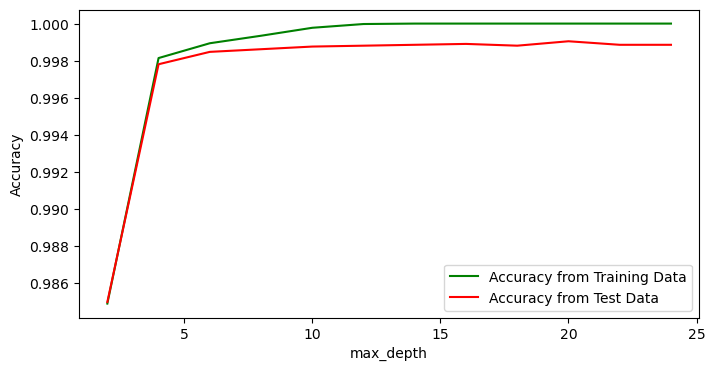

In [312]:
# search the max_depth  parameters to build the model

parameters = {'max_depth': range(2, 25, 2)}
tune_hyperparameter(parameters,x_train,y_train)

In [313]:
parameters

{'max_depth': range(2, 25, 2)}

#### Findings:
 - As shown in the figure, the higher the max_depth values, the higher accuracy scores for both train and test scores until they reach at a platau when the value of max_depth is reachig at 10. 
 - The max_depth values at *7 and 13* have a bigger jump on the accuracy scores that help to start doing our next step, a grid veiw search.
 - As the max_depth values increase, the ensemble might converge with higher overfit risks. Thus, controlling the depth of the trees will be likely to reduce overfitting in the tree models.

## Conduct n_estimators tuning
- Let's try to find the optimum values for n_estimators and understand how the value of n_estimators impacts the overall accuracy. Notice that we'll specify an appropriately low value of max_depth, so that the trees do not overfit.

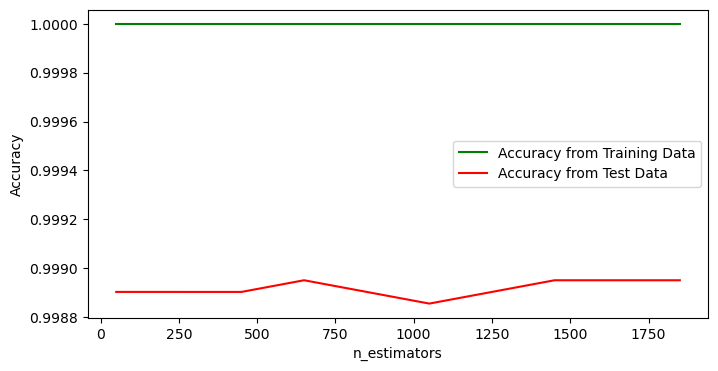

In [314]:
# Search the n_estimators parameters for building model
parameters = {'n_estimators': range(50, 2000, 200)}
tune_hyperparameter(parameters,x_train,y_train)

#### Findings :
- The accuracy remain very high between 0.988 and 0.9990. The value of n_estimators at 50 get the highest accuracy estimate. The value of *200* will be used for the next step, a grid view search.

## Conduct max_features tuning
- Let's see how the model performance varies with 'max_features', which is the maximum numbre of features considered for splitting at a node.

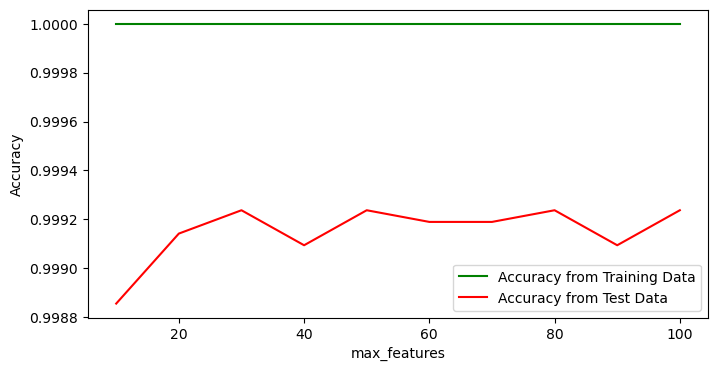

In [315]:
# Search the max_features parameters for the model

parameters = {'max_features': [10,20,30,40,50,60,70,80,90, 100]}
tune_hyperparameter(parameters,x_train,y_train,4)

#### Findings :
- As shown in the figure, the accuracy of train data is alwasy bettern than the one of test data. the accuracy of the test data looks much better at *30* and *70* for the max_features.

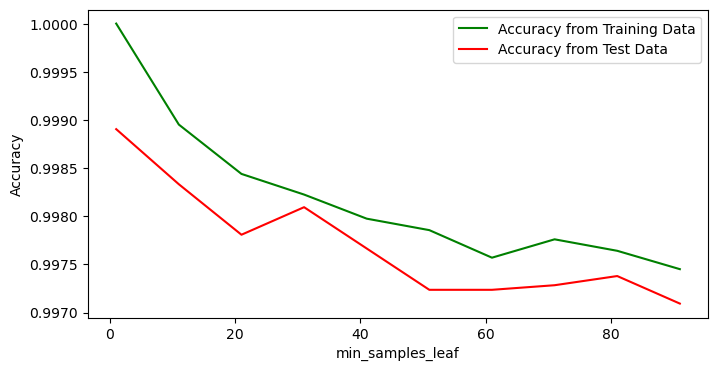

In [316]:
# Search the min_samples_leaf parameters for building the model

parameters = {'min_samples_leaf': range(1, 100, 10)}
tune_hyperparameter(parameters,x_train,y_train)

#### Findings :
- As shown in the figure, the model would get better accruacy with the min_samples_leaf between *3* and *12*  that is a good range for the next step, a grid search.

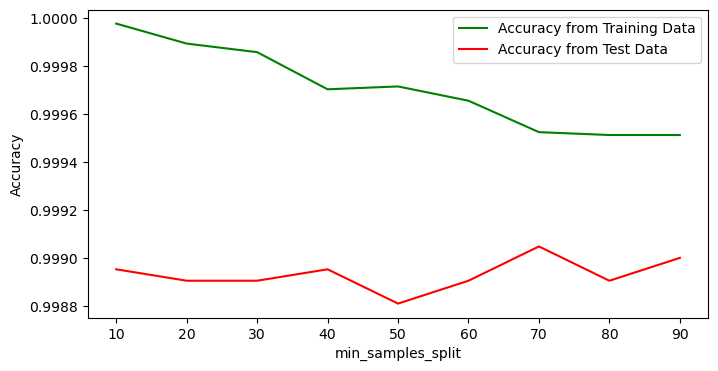

In [317]:
# Search the min_samples_split parameters for building the model

parameters = {'min_samples_split': range(10, 100, 10)}
tune_hyperparameter(parameters,x_train,y_train)

#### Findings :
- As shown in the figure, the model would get better accruacy with the min_samples_split between *10* and *40*  and the 60 alone that is a good range for the next step, a grid search.

## Conduct Grid Search to find Optimal Hyperparameters

In [318]:
# Get optimal hyperparameters using the GridSearchCV function.
# Set the parameters for further grid search based on the primary findings as described above 
# The parameters below are udpated according to the the primary search above.
    
param_grid = {
    'max_depth': [7,13],
    'n_estimators': [50],
    'max_features': [30,70],
    'min_samples_leaf': [5,12],
    'min_samples_split': [50]
}
# Create a based model

rf = RandomForestClassifier()

# Instantiate the grid search model

rf_grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True)

In [319]:
# Fit the grid search to the data

rf_grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [7, 13], 'max_features': [30, 70],
                         'min_samples_leaf': [5, 12], 'min_samples_split': [50],
                         'n_estimators': [50]},
             return_train_score=True, verbose=1)

In [320]:
# Present the optimal accuracy score and hyperparameters

print('The accuracy measure at '+str(round(rf_grid_search.best_score_,2))+ \
' coule be obtainable if the following parameters are set: '+str(rf_grid_search.best_params_))

The accuracy measure at 1.0 coule be obtainable if the following parameters are set: {'max_depth': 7, 'max_features': 30, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 50}


In [321]:
print("The maximum of the accuracy measure using the Random Forest classifier is >>>: "+str(round(rf_grid_search.best_score_,2)))

The maximum of the accuracy measure using the Random Forest classifier is >>>: 1.0


## Build and then evaluate the final model with Random Forest
- Check if the model has the highest test accuracy.

In [322]:
rfc = RandomForestClassifier(max_depth=7,
                             max_features=30,
                             min_samples_leaf=10,
                             min_samples_split=10,
                             n_estimators=200,
                             n_jobs = -1)
rfc.fit(X_train,y_train)


RandomForestClassifier(max_depth=7, max_features=30, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200, n_jobs=-1)

In [326]:
# Make the final rfc_prediction
rfc_prediction = rfc.predict(x_test)

In [327]:
rfc_prediction

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [330]:
final_solution_for_submission=pd.DataFrame(rfc_prediction,index=test_df['id'],columns=['churn_probability'])

In [331]:
#final_solution_for_submission=final_solution_for_submission.reset_index()

In [332]:
type(final_solution_for_submission)

pandas.core.frame.DataFrame

In [333]:
final_solution_for_submission

,churn_probability
id,
69999,0
70000,0
70001,1
70002,0
70003,0
...,...
99994,0
99995,0
99996,0


In [ ]:
final_solution_for_submission.to_csv("Submission.csv")

# 8. Get Feature Importance in Random Forests <a id ='feaimp'>

Global Vs Local Feature Importance Methods:

- Global feature importance can be defined as the overall importance of a variable/feature across all instances from the dataset provided, while local feature importance refers to the importance of a variable/feature for ONLT a specific instance.

### Built-in Feature Importance With Scikit-Learn

loc_ic_t2m_mou_8         0.648196
total_rech_amt_data_8    0.110048
av_rech_amt_data_8       0.103942
std_og_t2m_mou_8         0.044367
loc_og_t2m_mou_8         0.023131
total_rech_data_8        0.016358
vol_2g_mb_8              0.012960
std_og_t2t_mou_8         0.012416
spl_og_mou_8             0.005751
loc_ic_t2t_mou_8         0.004980
spl_ic_mou_8             0.002333
std_ic_t2t_mou_8         0.001881
dtype: float64

<Figure size 2000x1000 with 0 Axes>

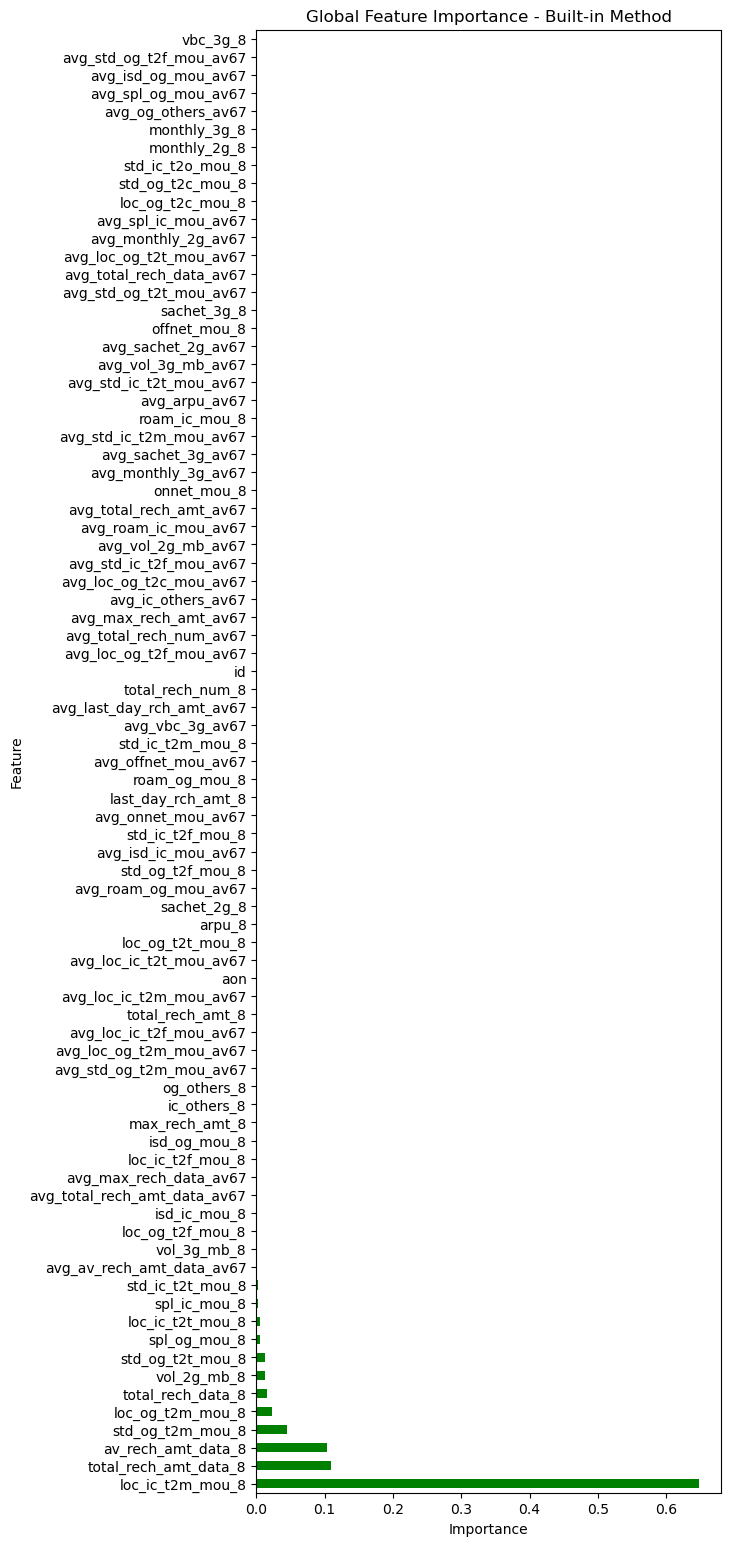

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10)) 
#plt.bar(x['Importance'], x['Feature'], color="blue")
#plt.rcParams['figure.figsize'] = [6, 17]
plt.figure().set_figheight(19)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

global_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=False, inplace=True)
global_importances.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

global_importances.head(81)

### Built-in Scikit-learn Method With A Random Feature
In this method, a random feature/column is added to the dataset and then the model is trained. A real feature should have a higher importance than the random feature. If not, it could mean that its importance is just due to chance. This is a very simple way to check if this method is robust. The random feature is added as a benchmark against to compare the relative importance with the actual features.

loc_ic_t2m_mou_8         0.648196
total_rech_amt_data_8    0.123086
av_rech_amt_data_8       0.090983
std_og_t2m_mou_8         0.043530
loc_og_t2m_mou_8         0.023689
total_rech_data_8        0.016218
std_og_t2t_mou_8         0.012946
vol_2g_mb_8              0.012902
spl_og_mou_8             0.005489
loc_ic_t2t_mou_8         0.004896
spl_ic_mou_8             0.002371
std_ic_t2t_mou_8         0.001860
dtype: float64

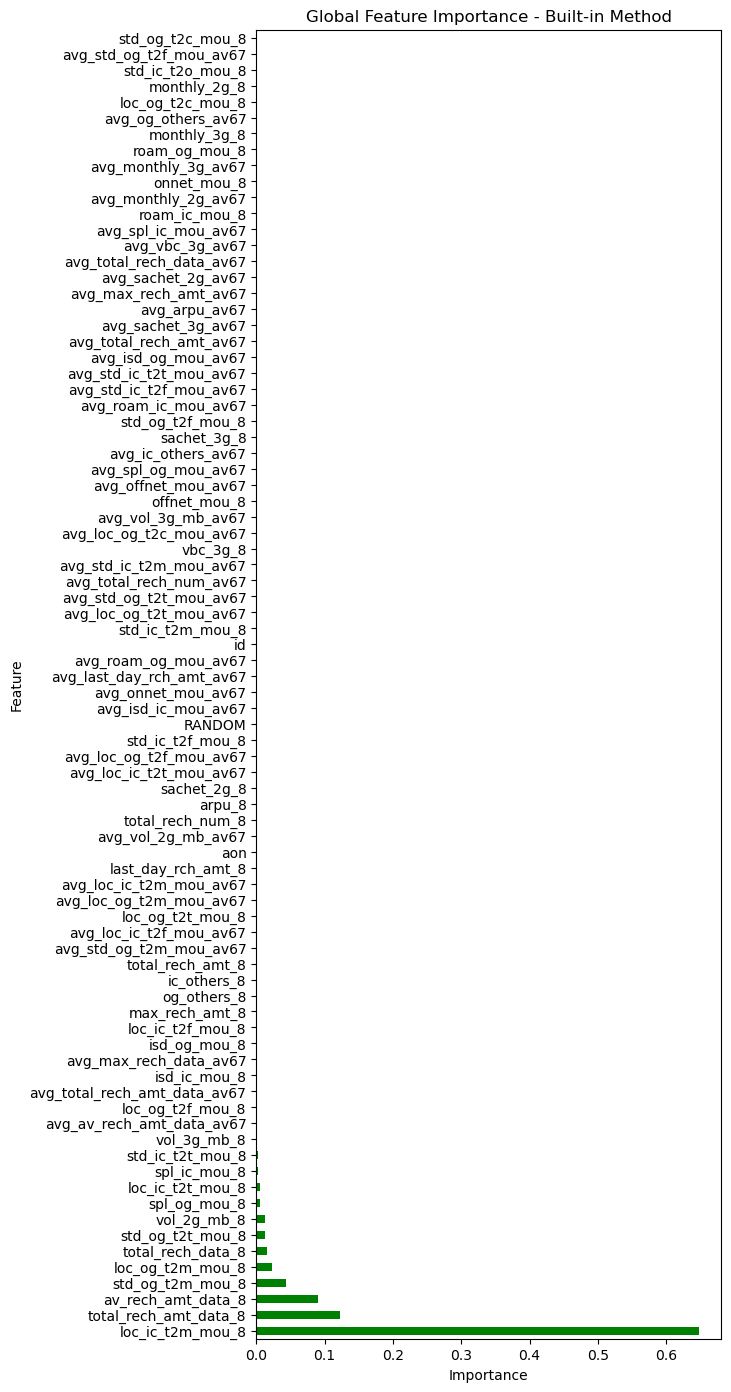

<Figure size 2000x1000 with 0 Axes>

<Figure size 600x1900 with 0 Axes>

In [ ]:
import numpy as np

X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestRegressor(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train)

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=False, inplace=True)

global_importances_random.plot.barh(color='green')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

plt.figure(figsize=(20,10)) 
#plt.bar(x['Importance'], x['Feature'], color="blue")
#plt.rcParams['figure.figsize'] = [6, 17]
plt.figure().set_figheight(19)

global_importances_random.head(12)

# 9. Recommandations for better business solutions <a id ='rec'>

- The quality of 2G/3G area coverage is important. There is a need to make improvement to keep customers stay.
- The 8th month is most critical time for keeping customers. The revenue for total recharge, average recharge, and total recharge data are very stronger predictions to keep customers stay in the service. 
- The quality of outgoing call is a very strong indicator. Especially, customers used the service for within same operator (mobile to mobile) and operator T to another operator mobile. 
- The Incoming and Outgoing Calls for 8th month are strong indicators of churning behavior
- The Local Incoming calls indicator is much important then the for the Outgoing calls indicator for the 8th month.